In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
# import bqplot
#from palettable.colorbrewer.diverging import *
# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots


In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
invoicedata = pd.read_csv('Final_invoice.csv',low_memory=False)

In [4]:
invoicedata.columns

Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID'],
     

In [5]:
invoicedata.shape

(492314, 59)

In [63]:
#df.head(25).to_csv('mahindra.csv')

In [60]:
#df['Total GST'].fillna(0,inplace=True)

In [6]:
invoicedata.isnull().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

In [7]:
invoicedata.nunique()

Unnamed: 0              492314
Amt Rcvd From Custom         1
Amt Rcvd From Ins Co         1
Area / Locality          65509
CGST(14%)                    1
CGST(2.5%)                   1
CGST(6%)                     1
CGST(9%)                     1
CITY                     19580
Cash /Cashless Type          3
Claim No.                 3909
Cust Type                    7
Customer No.            253484
District                    36
Expiry Date               1133
Gate Pass Date             423
Gate Pass Time           23874
IGST(12%)                    1
IGST(18%)                    1
IGST(28%)                    1
IGST(5%)                     1
Insurance Company           21
Invoice Date              1642
Invoice No              492314
Invoice Time             46697
Job Card No             489329
JobCard Date              1643
JobCard Time             42971
KMs Reading             159473
Labour Total            137154
Make                        28
Misc Total               17728
Model   

In [8]:
plantdf=pd.read_excel('Plant Master.xlsx')

In [9]:
plantdf.shape


(467, 13)

In [10]:
plandat=plantdf[['Plant','City','State']]

In [11]:
plandat.State.isnull().sum()

0

In [12]:
uniquecityplant=plandat['Plant'].unique().tolist()

In [40]:
#uniquecityplantsort=uniquecityplant.sort()

In [13]:
uniquecityinvoice=invoicedata['Plant'].unique().tolist()

In [41]:
#uniquecityinvoicesort=uniquecityinvoice.sort()

In [44]:
#uniquecityinvoicesort

In [13]:
print("Missing values in first list:", (set(uniquecityinvoice).difference(uniquecityplant)))

Missing values in first list: set()


In [32]:
uniquecityplant

['BC07',
 'BC30',
 'X001',
 'X002',
 'X003',
 'X005',
 'X006',
 'X007',
 'X008',
 'X010',
 'X011',
 'X012',
 'X013',
 'X014',
 'X016',
 'X017',
 'X018',
 'X020',
 'X021',
 'X022',
 'X023',
 'X024',
 'X025',
 'X026',
 'X027',
 'X028',
 'X029',
 'X031',
 'X032',
 'X033',
 'X034',
 'X035',
 'X036',
 'X037',
 'X039',
 'X041',
 'X042',
 'X044',
 'X045',
 'X046',
 'X047',
 'X048',
 'X049',
 'X050',
 'X051',
 'X052',
 'X053',
 'X054',
 'X055',
 'X056',
 'X057',
 'X058',
 'X060',
 'X061',
 'X062',
 'X063',
 'X064',
 'X065',
 'X066',
 'X068',
 'X072',
 'X073',
 'X074',
 'X075',
 'X076',
 'X079',
 'X080',
 'X081',
 'X082',
 'X083',
 'X084',
 'X085',
 'X086',
 'X089',
 'X091',
 'X092',
 'X095',
 'X097',
 'X098',
 'X099',
 'X101',
 'X102',
 'X103',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X118',
 'X119',
 'X121',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X131',
 'X132',
 'X133',
 'X135',
 'X136',
 'X138',
 

In [13]:
dft=pd.merge(invoicedata,plandat,how="inner",on='Plant')


In [14]:
dft.shape

(492314, 61)

In [15]:
dft['Customer No.'].isnull().sum()

0

In [67]:
custdfxls = pd.ExcelFile('Customer_Data.xlsx')

In [85]:

df1 = pd.read_excel(custdfxls, 'Sheet1')
df2 = pd.read_excel(custdfxls, 'Sheet2')

In [86]:

df1.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [87]:
df1.dtypes

Business Partner            object
Customer No.                object
Partner Type               float64
Data Origin                 object
Title                      float64
Marital Status             float64
Occupation                 float64
Date of Birth               object
Death date          datetime64[ns]
dtype: object

In [75]:
df1.dtypes

Business Partner            object
Customer No.                object
Partner Type               float64
Data Origin                 object
Title                      float64
Marital Status             float64
Occupation                 float64
Date of Birth               object
Death date          datetime64[ns]
dtype: object

In [88]:
df2.dtypes


Partner Type      float64
Description        object
Unnamed: 2        float64
Data Origin        object
Description.1      object
Short Name         object
Title             float64
Title.1            object
Marital Status    float64
Status             object
Occupation          int64
Description.2      object
dtype: object

In [58]:
df2.isnull().sum()

Partner Type      24
Unnamed: 1        24
Unnamed: 2        32
Data Origin        9
Unnamed: 4         9
Unnamed: 5         9
Unnamed: 6        32
Title             27
Unnamed: 8        27
Unnamed: 9        32
Marital Status    26
Unnamed: 11       26
Unnamed: 12       32
Occupation         0
Unnamed: 14        0
dtype: int64

In [89]:
df1 = df1.astype({"Partner Type": str})
df2 = df2.astype({"Partner Type": str})

In [60]:
df1.dtypes

Business Partner            object
Customer No.                object
Partner Type                object
Data Origin                 object
Title                      float64
Marital Status             float64
Occupation                 float64
Date of Birth               object
Death date          datetime64[ns]
dtype: object

In [77]:
df1.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [78]:
df2.isnull().sum()

Partner Type      24
Description       24
Unnamed: 2        31
Data Origin        9
Description.1      9
Short Name         9
Title             27
Title.1           27
Marital Status    26
Status            26
Occupation         0
Description.2      0
dtype: int64

In [90]:
dfcustomer.head()

Business Partner Customer No.  Partner Type Data Origin_x  Title_x  \
0               31            1           1.0          Z001      NaN   
1               32            2           1.0          Z005      NaN   
2               34            4           1.0          Z005      NaN   
3               35            5           1.0          Z005      NaN   
4               42            7           1.0          Z008      NaN   

   Marital Status_x  Occupation_x Date of Birth Death date Description  \
0               NaN           NaN           NaN        NaT      Retail   
1               NaN           NaN           NaN        NaT      Retail   
2               2.0           NaN           NaN        NaT      Retail   
3               NaN           NaN           NaN        NaT      Retail   
4               NaN           NaN           NaN        NaT      Retail   

   Unnamed: 2 Data Origin_y   Description.1      Short Name  Title_y Title.1  \
0         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
1         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
2         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
3         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
4         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   

   Marital Status_y  Status  Occupation_y Description.2  
0               1.0  Single             1      Director  
1               1.0  Single             1      Director  
2               1.0  Single             1      Director  
3               1.0  Single             1      Director  
4               1.0  Single             1      Director

In [91]:
dfcustomer3=pd.merge(df1,df2,how="inner",on='Partner Type')

In [92]:
dfcustomer3.shape

(557132, 20)

In [94]:
dfcustomer3.head()

Business Partner Customer No. Partner Type Data Origin_x  Title_x  \
0               31            1          1.0          Z001      NaN   
1               32            2          1.0          Z005      NaN   
2               34            4          1.0          Z005      NaN   
3               35            5          1.0          Z005      NaN   
4               42            7          1.0          Z008      NaN   

   Marital Status_x  Occupation_x Date of Birth Death date Description  \
0               NaN           NaN           NaN        NaT      Retail   
1               NaN           NaN           NaN        NaT      Retail   
2               2.0           NaN           NaN        NaT      Retail   
3               NaN           NaN           NaN        NaT      Retail   
4               NaN           NaN           NaN        NaT      Retail   

   Unnamed: 2 Data Origin_y   Description.1      Short Name  Title_y Title.1  \
0         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
1         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
2         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
3         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
4         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   

   Marital Status_y  Status  Occupation_y Description.2  
0               1.0  Single             1      Director  
1               1.0  Single             1      Director  
2               1.0  Single             1      Director  
3               1.0  Single             1      Director  
4               1.0  Single             1      Director

In [95]:
dfcustomer3.columns

Index(['Business Partner', 'Customer No.', 'Partner Type', 'Data Origin_x',
       'Title_x', 'Marital Status_x', 'Occupation_x', 'Date of Birth',
       'Death date', 'Description', 'Unnamed: 2', 'Data Origin_y',
       'Description.1', 'Short Name', 'Title_y', 'Title.1', 'Marital Status_y',
       'Status', 'Occupation_y', 'Description.2'],
      dtype='object')

In [97]:
dfcustomer3.head()

Business Partner Customer No. Partner Type Data Origin_x  Title_x  \
0               31            1          1.0          Z001      NaN   
1               32            2          1.0          Z005      NaN   
2               34            4          1.0          Z005      NaN   
3               35            5          1.0          Z005      NaN   
4               42            7          1.0          Z008      NaN   

   Marital Status_x  Occupation_x Date of Birth Death date Description  \
0               NaN           NaN           NaN        NaT      Retail   
1               NaN           NaN           NaN        NaT      Retail   
2               2.0           NaN           NaN        NaT      Retail   
3               NaN           NaN           NaN        NaT      Retail   
4               NaN           NaN           NaN        NaT      Retail   

   Unnamed: 2 Data Origin_y   Description.1      Short Name  Title_y Title.1  \
0         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
1         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
2         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
3         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   
4         NaN          Z001  Camp - Outdoor  Camp - Outdoor      1.0     Ms.   

   Marital Status_y  Status  Occupation_y Description.2  
0               1.0  Single             1      Director  
1               1.0  Single             1      Director  
2               1.0  Single             1      Director  
3               1.0  Single             1      Director  
4               1.0  Single             1      Director

In [98]:
 dfcustomerfinal=dfcustomer3[['Customer No.','Short Name','Description.2']]

In [46]:
dfcustomerfinal.rename(columns = {'Unnamed: 5':'source','Unnamed: 14':'desg'}, inplace = True) 

C:\Users\viren\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [99]:
dfcustomerfinal['Customer No.'].nunique()

555338

In [100]:
dfcustomerfinal.shape

(557132, 3)

In [101]:
dfcustomerfinal.head()

Customer No.      Short Name Description.2
0            1  Camp - Outdoor      Director
1            2  Camp - Outdoor      Director
2            4  Camp - Outdoor      Director
3            5  Camp - Outdoor      Director
4            7  Camp - Outdoor      Director

In [102]:
dfcustomerfinal.drop_duplicates(subset=None, keep='first', inplace=True)

C:\Users\viren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
dfcustomerfinal.shape

(557132, 3)

In [26]:
#dtype = dict('Customer No.'=str)

#dft.astype(dtype).merge(dfcustomerfinal.astype(dtype), 'inner')
#dft['Customer No.']=dft['Customer No.'].astype(str)
#dfcustomerfinal['Customer No.']=dfcustomerfinal['Customer No.'].astype(str)

C:\Users\viren\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [104]:
dft = dft.astype({"Customer No.": str})
dfcustomerfinal = dfcustomerfinal.astype({"Customer No.": str})


In [30]:
dft['Customer No.'].dtypes


dtype('O')

In [105]:
df=pd.merge(dft,dfcustomerfinal,how="inner",on='Customer No.')

In [107]:
df.shape

(530653, 63)

In [110]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Area / Locality: 0.0999% missing values
Cash /Cashless Type: 0.9418% missing values
Claim No.: 0.99% missing values
Expiry Date: 0.9572% missing values
Gate Pass Date: 0.9117% missing values
Insurance Company: 0.9546% missing values
Model: 0.0035% missing values
Policy no.: 0.9672% missing values
Regn No: 0.0% missing values
Technician Name: 0.4859% missing values
Short Name: 0.0283% missing values


In [111]:
df.drop(['Cash /Cashless Type','Claim No.','Expiry Date','Gate Pass Date','Policy no.','Insurance Company','CITY'],axis=1,inplace=True)

In [109]:
df.shape


(530653, 63)

In [112]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Area / Locality: 0.0999% missing values
Model: 0.0035% missing values
Regn No: 0.0% missing values
Technician Name: 0.4859% missing values
Short Name: 0.0283% missing values


In [113]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))


Amt Rcvd From Custom: 0.3812% missing value
Amt Rcvd From Ins Co: 0.3812% missing value
CGST(14%): 0.3812% missing value
CGST(2.5%): 0.3812% missing value
CGST(6%): 0.3812% missing value
CGST(9%): 0.3812% missing value
IGST(12%): 0.3812% missing value
IGST(18%): 0.3812% missing value
IGST(28%): 0.3812% missing value
IGST(5%): 0.3812% missing value
ODN No.: 0.3812% missing value
Outstanding Amt: 0.3812% missing value
SGST/UGST(14%): 0.3812% missing value
SGST/UGST(2.5%): 0.3812% missing value
SGST/UGST(6%): 0.3812% missing value
SGST/UGST(9%): 0.3812% missing value
Service Advisor Name: 1.0% missing value
TDS amount: 0.3812% missing value
Total CGST: 0.3812% missing value
Total GST: 0.3812% missing value
Total IGST: 0.3812% missing value
Total SGST/UGST: 0.3812% missing value
Total Value: 0.3812% missing value


In [37]:
df.nunique()

Unnamed: 0              492312
Amt Rcvd From Custom         1
Amt Rcvd From Ins Co         1
Area / Locality          65509
CGST(14%)                    1
CGST(2.5%)                   1
CGST(6%)                     1
CGST(9%)                     1
Cust Type                    7
Customer No.            253482
District                    36
Gate Pass Time           23874
IGST(12%)                    1
IGST(18%)                    1
IGST(28%)                    1
IGST(5%)                     1
Invoice Date              1642
Invoice No              492312
Invoice Time             46697
Job Card No             489327
JobCard Date              1643
JobCard Time             42971
KMs Reading             159472
Labour Total            137154
Make                        28
Misc Total               17727
Model                      245
ODN No.                 295028
OSL Total                29419
Order Type                   9
Outstanding Amt              1
Parts Total             212764
Pin code

In [24]:
for col in df.columns:
    
    if len(df[col].unique()) == 1:
        
        df.drop(col,inplace=True,axis=1)

In [114]:
df.shape

(530653, 56)

In [115]:
df.nunique()

Unnamed: 0              492312
Amt Rcvd From Custom         1
Amt Rcvd From Ins Co         1
Area / Locality          65509
CGST(14%)                    1
CGST(2.5%)                   1
CGST(6%)                     1
CGST(9%)                     1
Cust Type                    7
Customer No.            253482
District                    36
Gate Pass Time           23874
IGST(12%)                    1
IGST(18%)                    1
IGST(28%)                    1
IGST(5%)                     1
Invoice Date              1642
Invoice No              492312
Invoice Time             46697
Job Card No             489327
JobCard Date              1643
JobCard Time             42971
KMs Reading             159472
Labour Total            137154
Make                        28
Misc Total               17727
Model                      245
ODN No.                 295028
OSL Total                29419
Order Type                   9
Outstanding Amt              1
Parts Total             212764
Pin code

In [116]:
df.drop(columns=df.columns[df.nunique()==1], inplace=True)

In [117]:
df.shape

(530653, 36)

In [40]:
df.drop(columns=['Unnamed: 8'],axis=1,inplace=True)

In [41]:
df.shape

(530653, 37)

In [118]:
df.isnull().sum()

Unnamed: 0                   0
Area / Locality          53008
Cust Type                    0
Customer No.                 0
District                     0
Gate Pass Time               0
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model                     1870
ODN No.                 202275
OSL Total                    0
Order Type                   0
Parts Total                  0
Pin code                     0
Plant                        0
Plant Name1                  0
Print Status                 0
Recovrbl Exp                 0
Regn No                     16
Service Advisor Name    530653
Technician Name         257831
Total Amt Wtd Tax.           0
Total Value             202275
User ID                      0
City    

Thane
THNAE
THANE[W]
THANE
THANE[E]
THANE-W
THANE (W)
PCMC
thane
KHARGHAR
MUMBAI
KALAWA
GOREGAON [E]
CHUNABHATTI
MIRA ROAD [E]
POWAI
Thane WEST
MUMABI
KALYAN [W]
MUBAI
indore
KALWA NAKA THANE
NAVIMUMBAI
PUNE
Thane (W)
Navi Mumbai
MULUND-W
NAVI MUMBAI
MULUND-E
MAHIND
AMBADI ROAD, VASAI W
Kolshet, Thane
Bhiwandi
NEW MUMBAI
MULUND[W]
THANE [ W]
GHATKOPAR[W]
AIROLI
VIKROLI[E]
THYANE[W]
POKHRAN ROAD NO.1,
OPP.VASANTVIHAR SCHOOL THANE [W]
Manpada, Thane
MIRA ROAD THANE
Jambali Naka, Thane
MULUND
LOKMANY NAGAR
W
pune
ANAND NAGAR SINGAGADE RD
Pune
warje
PUNE,
BAVDHAN
LANE NO 14 , PUNE CITY
KULSHI COLONY
NEW SANGHVI
PIRANGUT
nagpur
PAUD RD
KOTHRUD
BAWDHAN PUNE
right bhusari colony kothrud depo
KALEWADI
HOSP.WARJE
NASIK
NASHIK
GONDE
Nashik
NIPHAD
nashik
KURLA
PIPE LINE  RD
DINDORI
BANGALORE
DEOLALI
RAJIV NAGAR
AHMED NAGAR
nasik
JAIL ROAD , NASHIK ROAD
SANGAMNARE
GANGAPUR ROAD
MAHAJAN NAGAR
RAJIVNAGAR
NASHIK PUNE ROAD
NEW NASIK
KALYAN( WEST)
nasiik
FLAT NO-301 SINNER PHATA
OZHAR
OZHAR TAL NIPHAD


goa
OZAR
TRAMBAK ROAD
GAGAPUR ROAD
shalimar
SATPUR LINK ROAD
CHANDWAD
SINER
DOMBAVLI
MAHIM
GSNGSPUR ROAD
TAKLI RD UPNAGAR
NR WISDOM HIGH SCHOOL ANADWALI
BODHALE NAGAR
JAIL ROAD  , NASHIK ROAD
PATHARDI PAHATA
asliabad
MADINAGUDA
hyderebad
HYDEWRABAD
borbanda
NIZAMPET VILLAGE,
ROYAPETTAH
THIRUPORUR MURUGAN TEMPLE
CBHENNAI
TIRUVANDRUM
RANCHI
NANGANALLURE,CHENNAI
CHENAI
TP SATHRAM,KILPAUK
PH RD
PUDHUR
VANNIER ST,CHOOLAIMEDU
REDDY ST.,KODANGUYUR
SENTHAMIL NAGAR,PATTABIRAM
TIRUVALLUR DIST
SKY CITY APPR,VANAGARAM
RUSAPET
1ST CROSS ST.,SABARI NAGAR
PONNIAMMANMEDU
OPP CMBT BUS TERMINUS
KUMARAN NGR,
MADURAVOIL MARKET
COURT COMPLEX
GOLDEN JEORGE NAGAR
FLOOR F2,NOLAMBURE
ARCOT ROAD,VADAPALANI
PERUMAL NAGAR,
4TH FLOOR
ARCORD RODA,BLOCK 4
MANNURPET
NEW COLONY,NERKUNDRAM
PHASE I,2ND CROSS ST,
MADURAVOIL,
VALAJA THALIK
NOLAMBURE,GURUSWAMY ST.,
SIPCOT,IRUGADU KOTTAI
1ST RHS RHS ORANGE BUILDING
VALASARAVAKKAM
THINDIVANAM
PERIYA KANCHEEPURAM
KANCHI PURAM
AYANAMBAKKAM
KENDRIYA VIHAR APPTS
KANDAN CHAVADI
G

KURLA(E)
HINJAWADI - 3
DATTAWADI
PASHAN ROAD
HINJAWADI PHASE-3
AMBEGAON BK, OFF SINHGAD ROAD
CHHATRAPATI CHOWK
THERGOAN
LONI KALBHOR HAVELI
HINJAWADI 1
AKKALKOT
THERGAON,
BANER ROAD
NAGPURQ
PIPLA VELA HARI NAGPUR
PHASE  3
sec-62, noida
tilpat faridabad
saboli delhi
BIRLA SOFT
sec-31, noida
bador pur
sec-76 noida
gyan khand-1, indirapuram ghaziabad
vijay nagar gzb
sec-128, noida
AHINSA KHAND 2 GHAZIOABAD
indirapuram, near shanti gopal gzb
budh vihar gzb
i.p. ext. delhi
GB Nagar
GAUTAM BUDDHA NAGAR
NOIDA SEC 62
alwar
ENCLAVE KHARAR
CND
YGNR
Sector 40D, Chandigarh
KURALI MOHALI
LIC COLONY , MUNDI KHARAR
BHUPINDER SINGH SEKHON FARM SARHALI
UT CHANDIGARH
FATEHGARAH SAHIB
IND AERA
SEC 125 KHARAR
DM COLONY
Malleshwaram
Mahalaxmi Layput
RAMANAGAR
2ND STAGE BANGALORE
SARJAPUR ROAD,BANGALORE
Banaalore
BANAGLORE
NAWASHAR
ZARMAJRI
JOGINDER NAGER
SECTOR 20 PANCHKULA
peer mushalla
barwala
SHIVNAGAR BIJLI NAGAR
SHAHU NAGAR
BHOSARI PCMC
KHALHI
AJAMERA PCMC
`PUNE
J BLOCK BHOSARI
MAMURDI
chinchwad
PANCH

HINGEWADI( PUNE)
MAIN SHALIMAR GARDEN
OFFICERS MESS
UNCHAGAON
navio mumbai
ANKLESHWAR
21-c
GAJIABAD
TENALAI
MARATHALLI
kapil vihar
INDRAPURAM NOIDA
BALAJI appt sahibabad gzb
ashoka enclave
EDAPPALLY,COCHIN
RAJ NAGAR
BESENT NAGAR,
GAMDI DELHI 53
PHASE -2
dilsuknagar
BENNGALURU
SAINIK PURI
SINGAD
`HYDERABAD
NEAR THRIKKAKARA ,ERANAKULAM
B 9/5 SEC 62 NOIDA
PERUMBALAM
VILUPPURM
GURGONE
bhopra
RAJINDER NAGAR GZB
MEWAT
HINDON SAHIBABAD
NASHIKI
ALLAPPEY DIST
SHALIMAR EXT-2
NAVEEN PARK
khar ghar
NEAR SAHIBABAD THANA
SEC-5 RAJINDER NAGAR
NR DATT MANDIR
HAPUD
THIRUMALIZHAI
JINNARAM
BHIVANDI THANE[W]
NEW BOWNPALLY
rail nagar colony,
YAMUNA VIHAR
NASHIK PHATA,
new bownpally
MEDID ENCLAVE VAISHALI
2
CHINMAYA NAGAR,CHENNAI
SANATH NAGAR
GANDHIPURAM
MADIPAKKAM,CHENNAI
SUNWAY,MEGAPOLIS HINJEWADI
gurgawon
NAVEEN SHADHRA
GADOLI EXT
KHANPUR
UTRAKHAND
P NAGAR
lalkhnau
THANA LONI
CHENNAIT
PUDUCHERI
UDHNA SURAT
NEAR HS COMPOUND
CHHATARPUR, NEW DELHI
balewadi. bharti vidyaopeetschool
NANJIL NADU,MYLADUDURAI
HY

Kadugathkundu
Palakkad
Vegara
KADAMPUZA
Thuvvakadu
Othukungal
Kurukkol
kadampuza
Kanmanam
Valiamuku
kainada
KAINADA
Kakinada
AMALAPURAM
BADAGAON
NAGRA
PRATHVIPUR
nsk
SHAHDOL
NEAR RAILWAY CROSSING RUDRAPUR
TULAJAPUR
Soapur
BELPARAO
RAMNAGAR
KALADHUNGI
MOHANUR ROAD
PARAMATHI VELUR
AMAW
CUTTACK
BHUBANESWAR,SATYA NAGARA
KHURDA
MAYURBHANJ
BHABANESWAR
BUHBANESWAR
NAYAPALLI,BHUBANESWAR
KHORDHA
DHENKANAL
JAJPUR
BERHAMPUR
TULSIPUR
NAYAGARH
MODEL TOWN, PATIALA
NAgda
Nagsa
SHIRVAL
MAHABALESHWAR
Koregao
MAHABLESHWAR
hayana
mahindergh
virathnagar
kotputli`
DICHPALLY
NIZAMADBA
ARMOOR
Pallavaram
Choolaimedu
T.Nagar, Usman Road
994/11 KK Nagar,
VIRUVURU
HARINATHPURAM
PH 8 B
SEC 126
SEC 116
RATRAKUTABUILDERS
bangalire
DR.SRK POST
yeshwanthpur
sparsha hospital
SANE CHOWK
ITIT ROAD AUND
une
POYS GARDEN
BENGALURU,
RAJEASTHAN
SOLAPURE
PAVAN TOURS AND TRAVELS
EDIGACOMPLEX,SHOP NO 1
BENGALOORU
VENKATA NAGAR
VILLIANUR,PUDUCHERRY
6th sector,chennai
Vikravandi road
Ayanur
BHUBANESWAR KHORDA
NEYVELI-6
PANDRUTI
P

NEW H.I.G.COLONY,ANNANAGAR
BAGHAT
TANDA NEW DELHI
CHHAPARA  SEONI
KALYANDURGAM
AURAIYA
ETHA
KAMEPALLY
KANCHIPURAM DST
k.p.m. dist
VALLAM POST C.P.T
pareri singaperumalkoil
CHEIYAR
TUTU
NAMKUM
BHATINDA
413106
PHALATAN
NIVARU
BUDH MARG
PS NATWAR
TRILANGA
ATHIRAPUZHA P O
KHACHROD
Amritsar
KALWAR RAOD  JOBNER JAIPUR
F744 RAOD NO-9F2
MANJALPUR VADODARA
Koppala
JAMAKHANDI
maski
Badnawar
Alniya
DUNGARPUR
gangawati
Kuttipuram
Ponnani
Knjipura
Kurukathani
Marakkara
Kuttipala
Parammal Agadi
Puthanathani`
KOTANANDHURU
TAKBET
DALSINGHSARAY
MAIN PURI
HATRASH
ALIGARG
SABRABAD
kotputi
kemrej
JAKRANPALLY
JAVAHAR NAGAR
NAGAR,NOLAMBURE
SUMANDARAMEDU,IRUKADUKOTTAI
CHOOLAI,NEAR NATRAJ THEATER
POLADPUR
KOPVUR
BERAMPUR
PH 6
srinagar
BANGALOIRE
BANGALIRE
BHAYENDER EAST
VILLUPURAM TALUK
amma pettai
DEVALAPURAM
No 40 CIRCULAR ROAD
RAYAPURAM, TIRUPUR
k.knagar   trichy
NEAR VARUN MODAL SCHOOL
NAVALUR,CHENNAI
SIVAKASI.
gao
Danvagere
vallikunnam, mavelikara
JHASJAR
veerapandiyapattnam
sethinallur
EDALAKUDY
COIMMBA

In [119]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

In [120]:
features_nan

['Area / Locality', 'Model', 'Regn No', 'Technician Name', 'Short Name']

In [121]:
## Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data



In [122]:
df=replace_cat_feature(df,features_nan)



In [123]:
df[features_nan].isnull().sum()

Area / Locality    0
Model              0
Regn No            0
Technician Name    0
Short Name         0
dtype: int64

In [124]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

ODN No.: 0.3812% missing value
Service Advisor Name: 1.0% missing value
Total Value: 0.3812% missing value


In [125]:
df.isnull().sum()

Unnamed: 0                   0
Area / Locality              0
Cust Type                    0
Customer No.                 0
District                     0
Gate Pass Time               0
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model                        0
ODN No.                 202275
OSL Total                    0
Order Type                   0
Parts Total                  0
Pin code                     0
Plant                        0
Plant Name1                  0
Print Status                 0
Recovrbl Exp                 0
Regn No                      0
Service Advisor Name    530653
Technician Name              0
Total Amt Wtd Tax.           0
Total Value             202275
User ID                      0
City    

In [126]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    #median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    #dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    df[feature].fillna(0,inplace=True)
    


In [127]:
df[numerical_with_nan].isnull().sum()

ODN No.                 0
Service Advisor Name    0
Total Value             0
dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

Thane
THNAE
THANE[W]
THANE
THANE[E]
THANE-W
THANE (W)
PCMC
thane
KHARGHAR
MUMBAI
KALAWA
GOREGAON [E]
CHUNABHATTI
MIRA ROAD [E]
POWAI
Thane WEST
MUMABI
KALYAN [W]
MUBAI
indore
KALWA NAKA THANE
NAVIMUMBAI
PUNE
Thane (W)
Navi Mumbai
MULUND-W
NAVI MUMBAI
MULUND-E
MAHIND
AMBADI ROAD, VASAI W
Kolshet, Thane
Bhiwandi
NEW MUMBAI
MULUND[W]
THANE [ W]
GHATKOPAR[W]
AIROLI
VIKROLI[E]
THYANE[W]
POKHRAN ROAD NO.1,
OPP.VASANTVIHAR SCHOOL THANE [W]
Manpada, Thane
MIRA ROAD THANE
Jambali Naka, Thane
MULUND
LOKMANY NAGAR
W
pune
ANAND NAGAR SINGAGADE RD
Pune
warje
PUNE,
BAVDHAN
LANE NO 14 , PUNE CITY
KULSHI COLONY
NEW SANGHVI
PIRANGUT
nagpur
PAUD RD
KOTHRUD
BAWDHAN PUNE
right bhusari colony kothrud depo
KALEWADI
HOSP.WARJE
NASIK
NASHIK
GONDE
Nashik
NIPHAD
nashik
KURLA
PIPE LINE  RD
DINDORI
BANGALORE
DEOLALI
RAJIV NAGAR
AHMED NAGAR
nasik
JAIL ROAD , NASHIK ROAD
SANGAMNARE
GANGAPUR ROAD
MAHAJAN NAGAR
RAJIVNAGAR
NASHIK PUNE ROAD
NEW NASIK
KALYAN( WEST)
nasiik
FLAT NO-301 SINNER PHATA
OZHAR
OZHAR TAL NIPHAD


vellor
catpadi
KRISHNGRIRI
arakonam
puducheery
cuddulore
villupuram dt
chdambaram
north st , Chiodambarm
SIRKALI
AANDI MADAM
PINNALUR
mariyappa nagar
B.MUTLUR
MAYAVARAM
THENNUR
CHIDAMBARM
CHIDAMBARAM A
PARANGIPET
KATTUMANNARKOIL
VADALUR
NEYVLEI
vridhachalam
VIRUDUCHALAM
VIRUDHACHALAM
KEELKANGAYEAN KUPPAM
CHEENI
M.V.KUPPAM. VILLGE&POST
MINNUR       AMBUR
KIRSHNAGIRI
KUPPAM
Ambur.
PONDYCHERRY,INDISTRIAL STATE
PALLIKONDA
Thuthiput
KASPA-B
GUDIYATHAM
THIRUPPATTUR
MADHANUR
GUDYATHAM
SHREEGONDA
PARNER
SHRIGONDA
RANJANGAON
PURANDER
shirur
AHAMADNAGAR
Shirur
nigoj
SHIKRAPUR
Shrigonda
karegaon
kopargaon
NAMAKKAL
COUIMBATORE
Erode
kancheepuram
Namahal
Namakkal
White field
KUMBAKONAM
TANJORE
KUMBOKANAM
M.C.ROAD
MALAPURAM
PATTUKOTTAI
KK NAGAR
DIKALUR KARANTHAI (PO)
KOVILUR
N.K.ROAD
SIVANGA
PUDUKOTTAI ROAD
VALLLAM (PO)
KANGAYAM ROAD
NEW HOUSING UNIT
MC ROAD
MANARKUDI (TK)
MADHAKOTTAI
VALLAM
PUDUKOTTAI(DT)
WEST MAIN ST
tiruchirapalli
contoment
dheerannagar,trichy
pudhukottai
srirangam trichy
ammapat

KINATHU KADAYU
PALAKKAD
UDHANKARAI
DHINDUKKAL
MOBIRAPATTY,(P)
DHRAMAPURI
SHIMOGA
BHADRAVATHI
shimoga
CHIKAMANGLORE
SHIKAripura
SHIKARIPURA
CHIKKAMANGLUR
THIRTHALLI
MANGLORE
ANKOLA
davanagere
HONNALI
DAVANAGERE
ACHUTHA RAO LAYOUT,2ND CROSS
CHIKAMANGLORE.KOPPA
CHENNAGIRI
BHADRAVATRHI
CHITRADURGA
CHANNAGIRI
SHIVAMOGGA
THIRTHAHALLI
TQ CHIKHLI DIST BULDHANA
DIST -PARBHANI
DIST- JALNA
PAITHAN
DIST NANDED
TQ AHMEDNAGAR
SHIRPUR
Thiruparankumdram
Alagappan Nagar
Thirumangalam
thirunagar, madurai
Sivakasi
madurai,
Ottanchathiram
MADURIA
thirumangalam, madurai
austin patti, madurai,
aruppukottai, virudhunagar,
avaniyapuram, madurai
KALLADAKURUCHI
5TH STOP
thirumangalam, madurai,
sivakasi, virudhunagar,
thirunel veli,
kariyapatti, virudhunagar,
aandalpuram,  madurai,
bykara, madurai,
thallakulam, madurai,
karimedu, madurai,
k. puthur, maduri,
ALAGAPANAGAR
vellachery, madurai,
iyer bangalaw, madurai,
palam station road, madurai,
SRIPUTHUVAPATTI,THIRUPUR
ponmeni, madurai,
thirunelveli,
agrinai appar

GROUND FLOOR VASUNDHRA ENCLAVE
mayur vihar phase 1,
VASUNDHRA APPT
dadri gautam budh nagar
MOHALI SAS NAGAR
JAGDHRI
Distt. Solan
SECTOR 26, CHANDIGARH
MUNDI KHARAR
PHASE 7
VILL.SOHANA, NEAR SINGH SHAHIDAN G
PAROL
CHITRAGURGA
YELAHANKA BANGALORE
BELAGUM
kunigal
Bangalorr
banalore
MARUTI ESTATE BODALA
KARNAl
SESSIONS COURT TOKARKHADA SILVASSA
NEW MADHOPURI
OPP.GURUDWARA
TALWARA
new shimla
CHAN DIGARH
PUHNE
Fl No.304, Nigadi
KANIWALI
MAJIWADA
DOMBIVALI (E)
BORIVALI (E)
BHANDUP (W)
RAMJI NAGAR, NELLORE
PUDUPET
MAYILADUTHURAI
MUMBAKKAM
MANALI
KANCHIPURAM DIST, CHENGALPET
KOTTURPURAM
GOV. POLYTECHNIC CLG.
M.G.R.NAGAR
ANAKAPUTTUR
ALWARPET
POZHICHALUR
VILLUPURAM DIST
NORTH USMAN ROAD, T.NAGAR
KEELAKAVATHUKUDI
GUMMIDIPUNDI DT
dombivali
byender west
miraroa
MIRA BHYNDER RD
GOLDEN NEST
chembur
dahasir
RAWAL PADA
shanti nagar
vile parle
sion
MIMBAI
GOREGAON WEAT
REDDIYARPALAYAM
VASANTHI NAGAR
VANUR TALUK
BALAJI NAGAR PUDUCHERRY
MOOLAKULAM
VILLIANUR COMMUNE
TIRUCHIRAPALLI
SULTHANPET
SEDARAPET
UPPAL

dharmavaram
MANCHIRIYALA
ANANTAPURAMU
anantapuramu
HIRIYUR
RAYADURGAM
ananthapuranu
RAMACHANDRAPURAM
KARLM NAGAR
srikalahasthi
ananthapuram
SRINIVASA TEMPLE
kanaganapalli
BELLANDU
K.L.G HISAR
DISTT-BHIWANI
HIASR
PALALNI
PPAAANI
ODDANCHATHIRAM
ODDANCHTHIRAM
BANGALURE
PPALANII
PALANY
PAALANI
AAYAKUDI
OTTANCHATHRAM
KUMBAGONAM
ANDRA PRADESH
DINDUGUL
TIRUVALLURU
AHMENAGAR
AMEDNAGAR
8 KM MILE STONE AGRA MATHURA HIGHWA
RUNKATA
MAINPURI
RUNKTA
TUNDLA
malur
kolar
mulbagal
kadugode
bangarpet
koalr
bagepalli
b'lore
kgf
3RD MAIN,EAST OF NGEF LAYOUT KASTHU
klar
tanuku
k g f
mulb
KUMARANALLOOR
CHRRY
ARPOOKARA
NATTASSERY
Nadiadem
MADDULAPALLI
SURYAPET B.S.N.L TOWER
LB NAGAR
VIDYANAGAR
BONAKAL ROAD.
Mustafa nagar
JAGGAIAHPETA
Golagadem rode
CHINTHALAPALEM
TELANGANA
Surya peta
Suryapeta
Ganesh padu
thota
kHAMMAM
NELAKONDAPALLI
ROAD NO:1 BHAGYA NAGAR
Burgampadu
Mahabube nagar
KRISHNA LANKA
KAVAVODDU
R.NO:3, GOLLADUDEM ROAD
MUNAGALA
PENGANCHIPROLU
BANDASUGUDEM
Telangana
MUDIGONDA
KAUIRAJ NAGAR
BALANAGAR 

1ST STREET,NERKUNDRAM
KOLATHURE
KHAR[W]
OPP MASID ROAD,MUTHUKUR ROAD
ICF COLONY,AMBATTUR
AMBATTUR VANAGARAM RD
THAMBARAM
TAL-PURANDAR
BENGALORE
ERIKARAI,MADURAVOYAL
Khopat
NAVIMUBAI
CUENNAI
gzn
JAMIN PALLAVARAM,
NO:D5,CENTURY GARDENS NEHRU NAGAR
GREATER MOHALI
THANE ( W )
DELHI,
next to kirti vihar delhi
ULAPAKKAM
HYDERABAD.
bnagalore
haryan
JAFFERKHANPET.
Nit faridabad
CHIMMAYANAGAR
DAHEGAO
FATHEGARH SAHIB
noida, g.b. nagar,
ATHAWALINES
BURHANI SANITORY ST,
AMBEGAV BK,
PLOTNO.20,KUKATPALLY
NEW CITY LIGHT
SURAJ PUR GAUTAM BUDH NAGAR
SHENOY NGR
TATA TELLY BISINES PARK
MADHAYAMARG CHANDIGAH
SHIPRA MALL
PERIAMET,
VANAGARAM RD
KOVUR MANDALAM
LUDHIOANA
ASHIANA KHAND
NEAR CHILDREN PARK ,SAI NAGAR
SADASHIVANAGAR
3RD LANE
PEINTH
YERAWADA
Kausa, Mumbra
PARRYS,
sullre peta
MOHANPET
SARITA VIHAR
RAJINDRA NAGAR SHB
NEHRU PLACE
INDUSTRIAL AREA NER VIJAY NAGAR
patperganj new delhi
201301
16,MANGALAM MITRA APTS
mundi kharar
ARUNACHALAM STREET
PHASE-1, HINJEWADI,
BEHIND ROYAL TOWER
18TH ST,ALAPAKKAM,


FAZALPUR
PH 7 IND AREA
SEC 22 A
SEC 56
BAHADUR GARH
LUDGHIANA
DHARMSHALA
MOREWASTI CHIKHALI
NAVI SANGAVI
TAL -HAVELI
BANGALAURU
SERACHERI
THIRUVOTTRIYUR
BORIVALI (WEST)
POONAMALLE,CHENNAI
VILLUPURAM, TAMILNADU
MUDALIARPET, PUDUCHERRY
OORAL KARAI MEDU
THIRUPapuliyur
poonamallee, CHENNAI
MANGLOR
KARDE
COIMBATOREE
LABOUR OFFICE NEAR
PONNAMAPET
JUDGE ROAD
HOSUR TK
P MALLUR POST
CHENNAI CAKES NEAR
KALIMAGAL SCHOOL
IYYAMPERUMPATTI POST
TELUGANA
uthamapalayam theni
near amman temple, trichy
BAGHAPURANA, MOGA
THERGAON PUNE
MAVEL TALEGAON DABHADE
SAVEDI,NAGAR
A,NAGR
CHENNAJ
PERUNDURAI
UTHANGARAI
CHALLAGHTTA
SALEM-636016
+
kayathar
NAGAMALAI PUTHUKOTTAI
bbkulam
thirupparankundaram
m kulluputhu main road
PONMANIJEYA NAGAR
kalligudi
PONNEERI
durg
najafghar
CHARKHI DADRI
TEH-KHARKHODA
tisayanvillai
nanguneri
ktc nagar
THISAYANVILLAI
PALAYAMAKOTTAI
PERUMALPYRAM
TIRUNELVE,LI
TIRUNELVE;LI
tiruneleli
takermalpuram
AGASTHEESWARAM TK
WEST STREET
UTHATHAKUDI
PANDIKOVIL
KOVIL STREET
Hyyderabad
munlamuru
Ma

DOOM LIGHT AREA
near police station
cantonment, trichy
GOBINDGARH
41102
ZKP
YNR
BHANTIAN
PATIALA ROAD
VIP ROAD ZIRKAPUR
nr pura
ANJANAPURA
BHOSARI PUNE
kanniyakumari
ANDALPURAM
DURAISAMY NAGAR
Tirumangalam
paramkudi
Ambathoor
HIS
TEH.-TIJARA
tirunelvelui
sathankulam
nazarath
tiunelveli
VILLUKURI
ARALVAIMOZHI
VEMBANOOR
PAPPA NAYAKAN PALAYAM
VANDIYUR
Nizamabad
machilipatnam
nandigama
ballupete
hirisawe
Chamraj Nagar
HEBBAL
MUSORE
PANDAVPURA
MYSOPRE
SAKLESHPURA
PALAN
srinivasapura
kuppam
GANDHI CHOWK
NIZAMPER
Bijaour
VIJAYKUMAR
vijaipura
bijhapur
vijipura
vijaypura
dfd
BIJPUR
KANCHIPURAM DIST,
K.M.KOIL,
LOSAL
HARIYANA
AWALGARH
JATWADA MOHALLA
SEC-1
PADHARAPUR
B.C.ROAD
GANGAPUR CITY
RAJAWASH
BALEKHAN
RAMPURA DABRI
SAMOD
NIWANA
CHOIMU
JAIOUR
TIGARIYA
RINGUS
LAKHISARAI
Darbhanga
ARA, AGIAON
BIHATA
PO GPO
SARAN CHAPRA
K NAGAR PATNA
CHAPRA
KULSHEKAR , MANGALORE
bhhopal
nainital
agra
KHALGAUN
munger
KAIPAMANGALAM
VNA
MZP
SINGOLI
CHITTORHARH
BAMORA/ NEEMUCH
NNEMUCH
CHOTTISADHRI
BASOD
MAYILADUDHU

KOTLA ROAD
FZB
VAKKALERI (H) KOLAR
jk purao
Begur main road
eroad
villupuram dst,
VIA RASI PALAYAVNI POST
SHIVALIK AVENUE NAYA NANGAL
PALASO
shiruru
MngLORE
AMBATTUR, CHENNAI
KAANGEYAM
CHERAN NAGAR
PURNEA
SULTANGANJ
GODDA
ANAPPARA P O
KUSUMAGIRI P O
CHAKKUPALLAM
sagar
KORADACHERI
MUTTUPETTAI
PINORE
kannauj
ROAD MURLIPURA
ROAD NO-13 JAIPUR
VIHAR18 NEW LOHA
VKI ROAD NO-1 MURLIPURA
MANDIR PANIPECH JAIPUR
LAHAR FOOT WERA
DHARAWAD. 7795515667
old Hubli
HUBLI. 9483784995
HUBLI. 9448112833
ANEGUNDI
VELLAVEDU,CH
MASURIYA JODHPUR
ROAD JODHPUR
BIKAQNER
gulbarg
gulbnarga
chadapur
bengalur
Poovanchina
Theyyalingal
Ponmundam
SAMALKOTA
BARAHIYA
BAKHRI
MULLANA
BAJPUR
Mangalweda
MORADABAD
paradeep
PARADEEOP
PARDEEP
Maharashtra
JHUMARI TELAIYA
KARAMNASA
jayadev vihar
bbsr,nayapali
SIRIPUR
GP-NAGAPUR
BALIPATANA
MANGALABAG
VIA-CHANDAKA
GGC
BAMANWAS
KAROLI
TEH. SAMANA
Berhampur
AMTALA
MURSHIDABAD
BERHUMPORE
DHANIRAMPUR
BHAGWANGOLA
BRAJRAJNAGAR
ARAL
MANKODIYA
SAKBARA
DOLVAN
DOLWAN
METPALLY
gupanpally
SIRPU

NANMANGALAM, CHENNAI
thiruthurai poondi
SEC-49 B
SEC 26
SHIVAMOGA
GHANSANGAVI
DIST ABAD
anjugramam
KARUNGAL.
VADAVELLI
pattapalayam
gudivada
reddy gudem
visakhapatnam
chikkamaglore
CHIKKAMAGALORE
.MYSORE
malavalli
Gonikoppa
bailkoppa
KOLLEGALA
anantap[ur
ANNATAPUR
PENUGONDA
Kolar ,
GST ROAD,GUDUVANCHERRY
CHEYYUR TK,
M CITY
VALLAM CHENGALPATTU
mandi
ADARSH COLONY GHUMARVIN
KARNJA
akola
Nashii
MANGALOPRE
MUTHUR
VARATHARAJALU NAGAR
KUNNUR
ARARIA
SIVVASSA
DAGA TRADERS
PANJABI BAAG APSARA TALKIES RAISEN
HUSSAIN KHAN ROAD BHOPAL
MOHAMMADPUR
PUTHANSANKETHAM
ELAMKULAM
mandsour
13102
KHUDDA ALI SHER
SEC 4
UMARKHEDE
7/96, JAIPUR
KARULI
VIHAR K
NAGAR ROAD- JAIPUR
ROAD N- 14
VKI ROAD NO5
DOONGRI JAIPUR
SEC-3,
DHER KE BALAJI
BELGAM
LINGSUGUR
NAVALAGUND
KADDUR
HUBLI. 9482755717
HUBLI. 8123667388
SAUNDATTI
SUTAGHTTI NAVNAGAR HUBLI
KACHAN
LAQTUR
opp tbk riice mill,thiruvallur
thuruvallur dist
threadi,thiruvallur
TEJA MANDIR ROAD JODHPUR
TIWARI
YADA GIRI GUTTA
THIRUGOKARNAM
basavaklyan
chidgumpa
basavk

TypeError: expected string or bytes-like object

In [128]:
df.columns

Index(['Unnamed: 0', 'Area / Locality', 'Cust Type', 'Customer No.',
       'District', 'Gate Pass Time', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Service Advisor Name', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID', 'City', 'State', 'Short Name',
       'Description.2'],
      dtype='object')

In [129]:
df.isnull().sum()

Unnamed: 0              0
Area / Locality         0
Cust Type               0
Customer No.            0
District                0
Gate Pass Time          0
Invoice Date            0
Invoice No              0
Invoice Time            0
Job Card No             0
JobCard Date            0
JobCard Time            0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
Model                   0
ODN No.                 0
OSL Total               0
Order Type              0
Parts Total             0
Pin code                0
Plant                   0
Plant Name1             0
Print Status            0
Recovrbl Exp            0
Regn No                 0
Service Advisor Name    0
Technician Name         0
Total Amt Wtd Tax.      0
Total Value             0
User ID                 0
City                    0
State                   0
Short Name              0
Description.2           0
dtype: int64

In [52]:
df['Make'].value_counts()

MARUTI SUZUKI           151932
MAHINDRA &  MAHINDRA    101179
HYUNDAI                  87526
TATA MOTORS              65854
GENERAL MOTORS           30678
FORD                     23295
TOYOTA                   22755
HONDA                    16568
VOLKSWAGEN                7277
SKODA                     6883
FIAT                      6736
RENAULT                   3521
NISSAN                    3205
MITSUBISHI MOTORS         1450
DAEWOO                     392
BMW                        257
MERCEDES BENZ              256
AUDI                       220
HINDUSTAN MOTORS           219
FORCE                      207
PREMIER AUTOMOBILES         93
SONALIKA                    87
LAND ROVER                  21
VOLVO                       19
SAN MOTORS                   8
JEEP                         7
PORCHE                       6
MORRIS                       2
Name: Make, dtype: int64

In [55]:
df.tail(100)

Area / Locality                                 CITY Cust Type  \
492214   RAMANATHAPURAM                           COIMBATORE    Retail   
492215          PODANUR                           COIMBATORE    Retail   
492216          PODANUR                                  CBE    Retail   
492217  KALAIPATTI ROAD                            COMBATORE    Retail   
492218                .                           COIMBATORE    Retail   
...                 ...                                  ...       ...   
492309                .                              Chennai    Retail   
492310                .                           ADAMBAKKAM    Retail   
492311          CHENNAI                              CHENNAI    Retail   
492312   DK NAGAR EXTN,  Vijaya Nagar, 1 main road,Velacherr    Retail   
492313        2ND FLOOR                             saidapet    Retail   

       Customer No.    District Gate Pass Time Invoice Date Invoice Time  \
492214       200593  Tamil Nadu       00:00:00   2016-06-29     12:02:33   
492215       199294  Tamil Nadu       00:00:00   2016-06-29     12:06:05   
492216       203309  Tamil Nadu       00:00:00   2016-06-29     14:28:50   
492217       199910  Tamil Nadu       00:00:00   2016-06-29     15:08:58   
492218       132912  Tamil Nadu       00:00:00   2016-06-29     15:28:34   
...             ...         ...            ...          ...          ...   
492309       203820  Tamil Nadu       00:00:00   2016-06-30     14:56:58   
492310       170411  Tamil Nadu       00:00:00   2016-06-30     15:06:52   
492311        48811  Tamil Nadu       00:00:00   2016-06-30     15:43:56   
492312       204067  Tamil Nadu       00:00:00   2016-06-30     15:58:59   
492313       204288  Tamil Nadu       00:00:00   2016-06-30     17:09:19   

        Job Card No JobCard Date JobCard Time  KMs Reading  Labour Total  \
492214       394710   2016-06-22     12:48:22        70734        248.64   
492215       392527   2016-06-18     13:40:05        94559       1300.00   
492216       399212   2016-06-28     17:45:11        19544       3749.14   
492217       393571   2016-06-20     15:48:01       102464        496.47   
492218       398877   2016-06-28     13:03:20        10507        753.85   
...             ...          ...          ...          ...           ...   
492309       400100   2016-06-30     09:15:12        72546       2495.90   
492310       400092   2016-06-30     08:42:15        18968       2443.47   
492311       400082   2016-06-30     08:27:51       177433       2598.92   
492312       400545   2016-06-30     12:53:48        22932      11000.00   
492313       400891   2016-06-30     16:54:06       149197        747.78   

                        Make  Misc Total         Model  ODN No.  OSL Total  \
492214                 HONDA        0.00          CITY      0.0        0.0   
492215               HYUNDAI        0.00        SANTRO      0.0        0.0   
492216         MARUTI SUZUKI        0.00   SWIFT DZIRE      0.0        0.0   
492217               HYUNDAI        0.00           I10      0.0        0.0   
492218         MARUTI SUZUKI        0.00         SWIFT      0.0        0.0   
...                      ...         ...           ...      ...        ...   
492309         MARUTI SUZUKI      374.97          ALTO      0.0        0.0   
492310                NISSAN        0.00         MICRA      0.0        0.0   
492311  MAHINDRA &  MAHINDRA        0.00  SCORPIO CRDE      0.0        0.0   
492312                 HONDA      100.00         AMAZE      0.0        0.0   
492313         MARUTI SUZUKI        0.00        WAGONR      0.0        0.0   

             Order Type  Parts Total  Pin code Plant  \
492214  Running Repairs         0.00    641036  X331   
492215  Running Repairs         0.00    641023  X331   
492216       Accidental         0.00    641023  X331   
492217  Running Repairs      1014.88    641048  X331   
492218  Running Repairs         0.00    641001  X331   
...                 

In [42]:
df.nunique()

Area / Locality        65510
Cust Type                  7
Customer No.          253484
District                  36
Gate Pass Time         23874
Invoice Date            1642
Invoice No            492314
Invoice Time           46697
Job Card No           489329
JobCard Date            1643
JobCard Time           42971
KMs Reading           159473
Labour Total          137154
Make                      28
Misc Total             17728
Model                    246
ODN No.               295029
OSL Total              29419
Order Type                 9
Parts Total           212765
Pin code               11810
Plant                    242
Plant Name1              244
Print Status               2
Recovrbl Exp             192
Regn No               260325
Technician Name        15045
Total Amt Wtd Tax.    258071
Total Value           168861
User ID                  557
City                     196
State                     23
dtype: int64

In [90]:
num_col=df.select_dtypes(include=['float64','int64'])

In [91]:
num_col.dtypes

Invoice No                int64
Job Card No               int64
KMs Reading               int64
Labour Total            float64
Misc Total              float64
ODN No.                 float64
OSL Total               float64
Parts Total             float64
Pin code                  int64
Recovrbl Exp            float64
Service Advisor Name    float64
Total Amt Wtd Tax.      float64
Total Value             float64
dtype: object

In [45]:
num_col.shape

(492314, 12)

In [48]:
from scipy.stats import shapiro as shp

C:\Users\viren\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


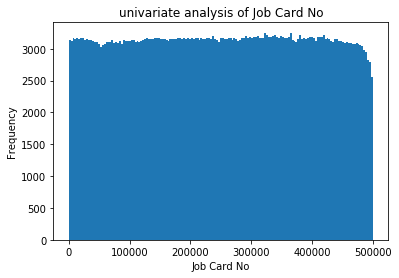

mean = 249405.29
median = 249792.5
q1 = 1277.78
q3 = 3741.35
minimum = 4
maximum = 499962
kurtosis = -1.19
p_value = 0


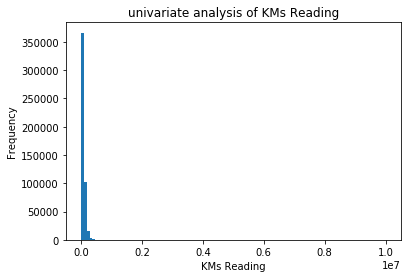

mean = 77577.03
median = 60078.5
q1 = 603.57
q3 = 2472.0
minimum = 0
maximum = 9999999
kurtosis = 1525.77
p_value = 0


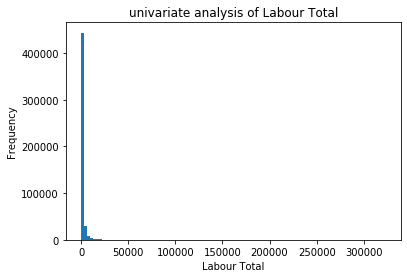

mean = 1353.65
median = 537.99
q1 = 0.0
q3 = 0.0
minimum = -137.0
maximum = 323000.0
kurtosis = 637.91
p_value = 0


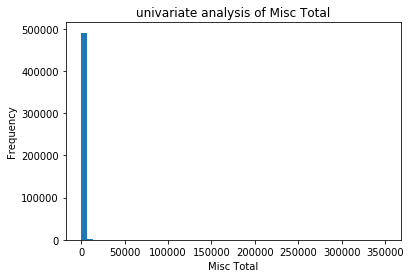

mean = 138.66
median = 0.0
q1 = 0.0
q3 = 0.0
minimum = -0.01
maximum = 350000.0
kurtosis = 13310.84
p_value = 0


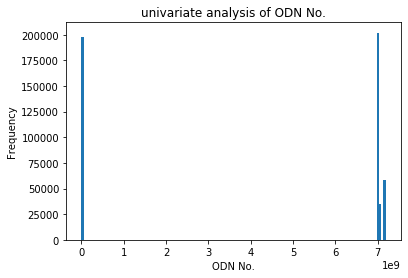

mean = 4216323642.93
median = 7000049787.5
q1 = 0.0
q3 = 0.0
minimum = 0.0
maximum = 7185000138.0
kurtosis = -1.84
p_value = 0


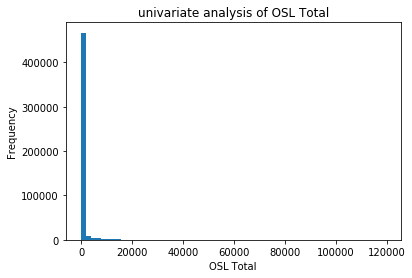

mean = 466.07
median = 0.0
q1 = 0.0
q3 = 0.0
minimum = 0.0
maximum = 119444.19
kurtosis = 235.85
p_value = 0


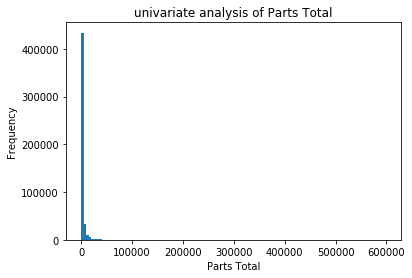

mean = 2436.61
median = 244.56
q1 = 0.0
q3 = 0.0
minimum = -0.01
maximum = 598003.48
kurtosis = 583.93
p_value = 0


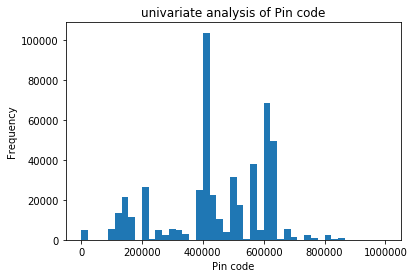

mean = 445353.24
median = 440008.0
q1 = 0.0
q3 = 0.0
minimum = 0
maximum = 999999
kurtosis = -0.32
p_value = 0


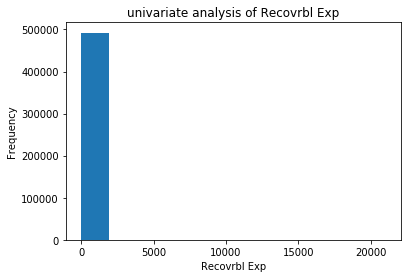

mean = 1.17
median = 0.0
q1 = 0.0
q3 = 0.0
minimum = 0.0
maximum = 21000.26
kurtosis = 33067.14
p_value = 0


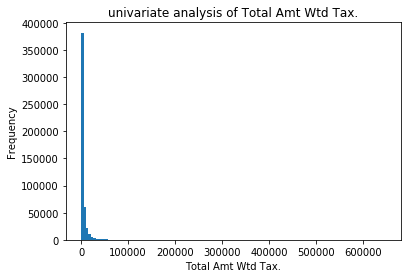

mean = 4394.98
median = 1452.82
q1 = 0.0
q3 = 0.0
minimum = -137.0
maximum = 648203.49
kurtosis = 289.8
p_value = 0


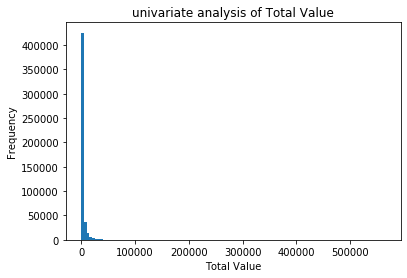

mean = 2647.64
median = 199.14
q1 = 0.0
q3 = 0.0
minimum = 0.0
maximum = 565487.2
kurtosis = 365.24
p_value = 0


In [41]:
for col in num_col:
    col_mean = round(df[col].mean(),2)
    col_median = round(df[col].median(),2)
    q1 = round(np.percentile(df[col], 0.25),2)
    q3 = round(np.percentile(df[col], 0.75),2)
    minimum = round(df[col].min(),2)
    maximum = round(df[col].max(),2)
    kurtosis = round(df[col].kurt(),2)
    p_value = round(shp(df[col])[1])
    n = df[col].nunique()
    df[col].plot(kind = "hist", bins = int(2*np.cbrt(n)))
    plt.xlabel(col)
    plt.title(f"univariate analysis of {col}")
    plt.show()
    print(f"mean = {col_mean}")
    print(f"median = {col_median}")
    print(f"q1 = {q1}")
    print(f"q3 = {q3}")
    print(f"minimum = {minimum}")
    print(f"maximum = {maximum}")
    print(f"kurtosis = {kurtosis}")
    print(f"p_value = {p_value}")

In [53]:
df_cat=df.select_dtypes(include=['object'])

In [54]:
df_cat.shape

(530653, 23)

In [55]:
df_cat.columns

Index(['Area / Locality', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'Make', 'Model', 'Order Type', 'Plant', 'Plant Name1',
       'Print Status', 'Regn No', 'Technician Name', 'User ID', 'City',
       'State', 'source', 'status', 'desg'],
      dtype='object')

In [49]:
df['District'].value_counts(sort=True)[:20]

Maharashtra         128119
Tamil Nadu          116309
Karnataka            44135
Andhra Pradesh       40604
Uttar Pradesh        31534
Gujarat              24403
Punjab               22741
Haryana              17971
Madhya Pradesh       13598
Rajasthan            13466
Telangana             7741
Kerala                6002
Delhi                 5414
Chandigarh            3319
Himachal Pradesh      3316
Bihar                 3258
Uttarakhand           2541
Odisha                2305
Puducherry            1716
West Bengal           1332
Name: District, dtype: int64

In [102]:
for col in df_cat:
    print('Value counts for Column- ',col,':')
    temp = df[col].value_counts(normalize=True)*100
    print(temp)
   # plt.pie(temp,labels = temp.index, autopct='%1.1f%%', shadow=True)
   # plt.show()

Value counts for Column-  Area / Locality :
.                5.682958
Missing          4.852594
NASIK            1.622339
THANE            1.122657
NAGPUR           0.895160
                   ...   
TEH DHAMPUR      0.000203
INDER NAGAR      0.000203
KAVERIPET        0.000203
LACK             0.000203
TRIPPUNITHURA    0.000203
Name: Area / Locality, Length: 65510, dtype: float64
Value counts for Column-  CITY :
CHENNAI       5.837750
PUNE          4.070378
HYDERABAD     2.869516
NASIK         2.446614
NAGPUR        2.027166
                ...   
irungalur     0.000203
Railnagar     0.000203
SEC 41        0.000203
aanamalai     0.000203
HYDERABAAD    0.000203
Name: CITY, Length: 19580, dtype: float64
Value counts for Column-  Cust Type :
Retail              99.325837
Fleets               0.450525
Corporate others     0.117608
Corporate- M&M       0.051593
MFCWL                0.051187
Franchise            0.003047
Insurance            0.000203
Name: Cust Type, dtype: float64
Value cou

C:\Users\viren\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\viren\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


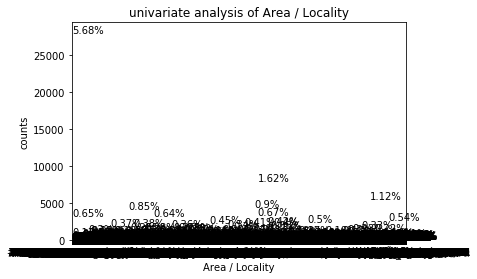

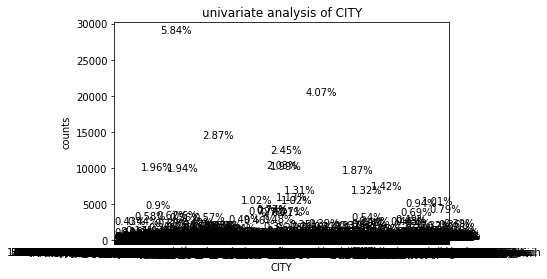

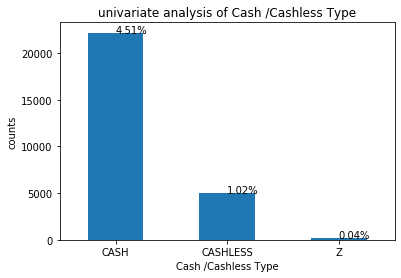

In [ ]:
'''for col in df_cat:
    
    df[col].value_counts().sort_index().plot(kind = "bar")
    total = len(df[col])
    for num, counts in enumerate(df[col].value_counts().sort_index()):
        plt.text(x = num, y = counts, s = str(round(100*counts/total,2)) + "%")
    plt.xticks(rotation = 0)
    plt.xlabel(col)
    plt.ylabel("counts")
    plt.title(f"univariate analysis of {col}")
    plt.show()
  '''  

In [51]:
df_cat.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'JobCard Date',
       'JobCard Time', 'Make', 'Model', 'Order Type', 'Plant', 'Plant Name1',
       'Print Status', 'Regn No', 'Technician Name', 'User ID'],
      dtype='object')

In [52]:
df['Cust Type'].value_counts()

Retail              488995
Fleets                2218
Corporate others       579
Corporate- M&M         254
MFCWL                  252
Franchise               15
Insurance                1
Name: Cust Type, dtype: int64

In [19]:
#df['Insurance Company'].value_counts()

THE NEW INDIA ASSURANCE CO. LTD.       5401
NATIONAL INSURANCE COMPANY LIMITED     3233
UNITED INDIA INSURANCE CO. LTD         2405
RELIANCE GENERAL INSURANCE COMPANY     1812
ICICI LOMBARD CUSTOMER DUES            1646
Oriental Insurance Company Ltd.        1289
BHARTI AXA GENRERAL INSURANCE          1226
BAJAJ ALLIANZE GENERAL INSURANCE CO     960
UNIVERSAL SOMPO GENERAL INSURANCE C     844
IFFCOTOKIO GENERAL INSURANCE            805
TATA AIG GENERAL INSURANCE CO. LTD.     791
HDFC ERGO                               730
CHOLAMANDALAM GENERAL INSURANCE CO.     683
ROYAL SUNDARAM GENERAL                  490
Future Generali India Ins. Co Ltd       413
SBI General Insurance Company Ltd.      328
L&T INSURANCE                           232
Magma HDI General Insurance Co Ltd      110
Kotak Mahindra General Insurance Lt      69
LIBERTY VIDEOCON GENERAL INSURANCE       65
Corporate Warranties India Pvt. Ltd      59
Name: Insurance Company, dtype: int64

In [53]:
df['Make'].value_counts()

MARUTI SUZUKI           147102
MAHINDRA &  MAHINDRA     87356
HYUNDAI                  85342
TATA MOTORS              58034
GENERAL MOTORS           29092
FORD                     21616
TOYOTA                   19466
HONDA                    15464
SKODA                     6515
FIAT                      6437
VOLKSWAGEN                6150
RENAULT                   3429
NISSAN                    3090
MITSUBISHI MOTORS         1427
DAEWOO                     392
BMW                        257
MERCEDES BENZ              256
AUDI                       220
HINDUSTAN MOTORS           219
FORCE                      207
PREMIER AUTOMOBILES         93
SONALIKA                    87
LAND ROVER                  21
VOLVO                       19
SAN MOTORS                   8
JEEP                         7
PORCHE                       6
MORRIS                       2
Name: Make, dtype: int64

In [54]:
df['Model'].value_counts()

SWIFT                    31899
ALTO                     28569
SANTRO                   24536
SCORPIO CRDE             23771
WAGONR                   22864
                         ...  
LAND ROVER FREELANDER        1
ECO SPORT                    1
Z4                           1
TT                           1
TREKKER                      1
Name: Model, Length: 246, dtype: int64

In [55]:
df['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

In [101]:
df['Plant'].value_counts()

BC03    28615
BC01    14483
BC05    13323
BC26    13253
BC06    12752
        ...  
X432       11
X339        8
X359        5
X206        2
X211        1
Name: Plant, Length: 242, dtype: int64

In [56]:
df_cat.isnull().sum()

Area / Locality    0
Cust Type          0
Customer No.       0
District           0
Gate Pass Time     0
Invoice Date       0
Invoice Time       0
JobCard Date       0
JobCard Time       0
Make               0
Model              0
Order Type         0
Plant              0
Plant Name1        0
Print Status       0
Regn No            0
Technician Name    0
User ID            0
City               0
State              0
dtype: int64

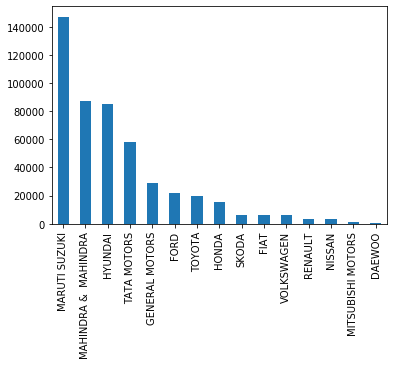

In [57]:
df['Make'].value_counts(sort=True).nlargest(15).plot.bar()


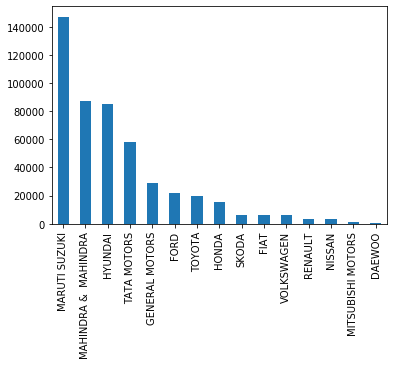

In [36]:
df['Make'].value_counts(sort=True)[:15].plot.bar()


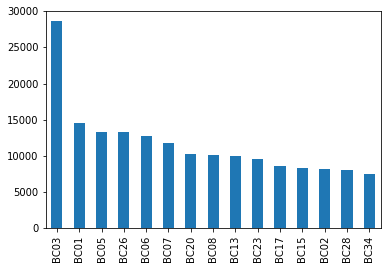

In [58]:
df['Plant'].value_counts(sort=True).nlargest(15).plot.bar()

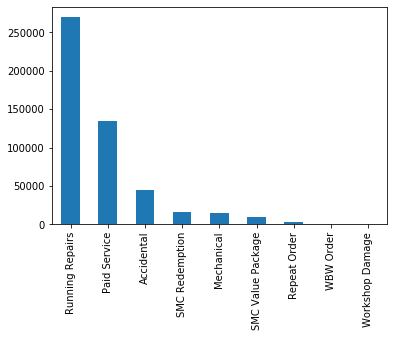

In [50]:
df['Order Type'].value_counts(sort=True).nlargest(15).plot.bar()

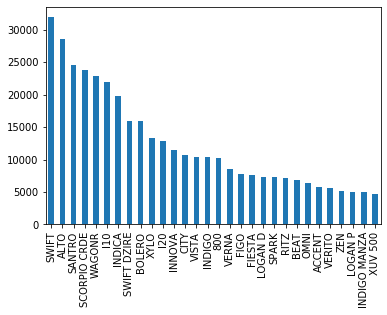

In [51]:
df['Model'].value_counts(sort=True).nlargest(30).plot.bar()

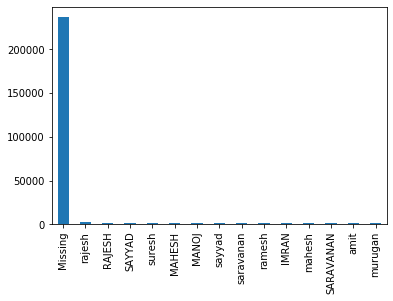

In [52]:
df['Technician Name'].value_counts(sort=True).nlargest(15).plot.bar()

In [1]:
#df['City'].value_counts(sort=True).nlargest(25).plot.bar()

NameError: name 'df' is not defined

In [62]:
#df['Insurance Company'].value_counts(sort=True).nlargest(15).plot.bar()

KeyError: 'Insurance Company'

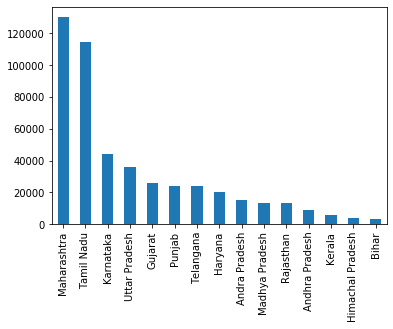

In [61]:
df['State'].value_counts(sort=True).nlargest(15).plot.bar()

In [69]:
#df['District'].unique()

array(['Maharashtra', 'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh',
       'Telangana', 'Tripura', 'Tamil Nadu', 'Punjab', 'Kerala',
       'Puducherry', 'Gujarat', 'Haryana', 'Dadra and Nagar Hav.',
       'Daman and Diu', 'Uttar Pradesh', 'Delhi', 'Uttarakhand',
       'Chandigarh', 'Manipur', 'Himachal Pradesh', 'Arunachal Pradesh',
       'Rajasthan', 'Jammu and Kashmir', 'Megalaya', 'Bihar', 'Jharkhand',
       'West Bengal', 'Chhattisgarh', 'Nagaland', 'Sikkim', 'Goa',
       'Lakshadweep', 'Andaman and Nico.In.', 'Odisha', 'Mizoram',
       'Assam'], dtype=object)

In [ ]:
#distr=df['District'].unique().tolist()


In [83]:
#distr

['Maharashtra',
 'Madhya Pradesh',
 'Karnataka',
 'Andhra Pradesh',
 'Telangana',
 'Tripura',
 'Tamil Nadu',
 'Punjab',
 'Kerala',
 'Puducherry',
 'Gujarat',
 'Haryana',
 'Dadra and Nagar Hav.',
 'Daman and Diu',
 'Uttar Pradesh',
 'Delhi',
 'Uttarakhand',
 'Chandigarh',
 'Manipur',
 'Himachal Pradesh',
 'Arunachal Pradesh',
 'Rajasthan',
 'Jammu and Kashmir',
 'Megalaya',
 'Bihar',
 'Jharkhand',
 'West Bengal',
 'Chhattisgarh',
 'Nagaland',
 'Sikkim',
 'Goa',
 'Lakshadweep',
 'Andaman and Nico.In.',
 'Odisha',
 'Mizoram',
 'Assam']

In [114]:
#distr=df['District'].unique().tolist()
#for d in distr:
    
    
    #print(District)
    
#    print(df[df['District']==d].groupby(['District','Make','Model'])['Model'].count())
   
    
        


District     Make        Model     
Maharashtra  AUDI        A4             18
                         A6              6
                         A7              1
                         A8              5
                         Q5             16
                                      ... 
             VOLKSWAGEN  PASSAT         19
                         POLO          668
                         TOUAREG         3
                         VENTO         507
             VOLVO       VOLVO XC90      3
Name: Model, Length: 232, dtype: int64
District        Make        Model     
Madhya Pradesh  AUDI        A4              5
                            A6              4
                            Q5              8
                            Q7              5
                BMW         3 SERIES        2
                                         ... 
                VOLKSWAGEN  PASSAT          3
                            POLO          159
                            VENTO          78

District           Make                  Model       
Jammu and Kashmir  GENERAL MOTORS        BEAT            1
                   HONDA                 AMAZE           1
                                         JAZZ            1
                   HYUNDAI               EON             1
                                         I10             2
                                         VERNA           1
                   MAHINDRA &  MAHINDRA  SCORPIO CRDE    3
                                         XUV 500         1
                   MARUTI SUZUKI         SWIFT           5
                                         SWIFT DZIRE     1
                                         WAGONR          1
                   TATA MOTORS           INDIGO          2
                   TOYOTA                INNOVA          1
Name: Model, dtype: int64
District  Make           Model 
Megalaya  HYUNDAI        SANTRO    1
          MARUTI SUZUKI  ALTO      3
                         EECO      1
          

In [112]:

   # df.groupby(['District','Make','Model'])['Model'].count()
   

District              Make                  Model       
Andaman and Nico.In.  FIAT                  LINEA           2
                      MAHINDRA &  MAHINDRA  SCORPIO CRDE    3
                      MARUTI SUZUKI         SWIFT DZIRE     1
                      TOYOTA                ETIOS           1
                                            FORTUNER        1
                                                           ..
West Bengal           TOYOTA                COROLLA         2
                                            ETIOS           7
                                            INNOVA          8
                                            QUALIS          3
                      VOLKSWAGEN            POLO            1
Name: Model, Length: 3450, dtype: int64

In [92]:
df.isnull().sum()

Area / Locality         0
Cust Type               0
Customer No.            0
District                0
Gate Pass Time          0
Invoice Date            0
Invoice No              0
Invoice Time            0
Job Card No             0
JobCard Date            0
JobCard Time            0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
Model                   0
ODN No.                 0
OSL Total               0
Order Type              0
Parts Total             0
Pin code                0
Plant                   0
Plant Name1             0
Print Status            0
Recovrbl Exp            0
Regn No                 0
Service Advisor Name    0
Technician Name         0
Total Amt Wtd Tax.      0
Total Value             0
User ID                 0
City                    0
State                   0
source                  0
status                  0
desg                    0
dtype: int64

In [56]:
distr=df['State'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['State']==d].groupby(['State','Model','desg'])['desg'].count().reset_index(name='count') 
                             .sort_values(['count'], ascending=False))
   
    

            State         Model      desg  count
1437  Maharashtra         SWIFT  Director   8527
1649  Maharashtra        WAGONR  Director   8141
99    Maharashtra          ALTO  Director   7174
1292  Maharashtra  SCORPIO CRDE  Director   7027
1237  Maharashtra        SANTRO  Director   6590
...           ...           ...       ...    ...
898   Maharashtra         LAURA       CFO      1
1527  Maharashtra            TT  Director      1
899   Maharashtra         LAURA       CTO      1
900   Maharashtra         LAURA      Capt      1
904   Maharashtra         LAURA    Doctor      1

[1809 rows x 4 columns]
         State    Model              desg  count
671  Karnataka    SWIFT          Director   2962
337  Karnataka   INDICA          Director   2009
417  Karnataka   INNOVA          Director   1966
37   Karnataka     ALTO          Director   1888
620  Karnataka   SANTRO          Director   1665
..         ...      ...               ...    ...
467  Karnataka  LOGAN D  Regional Manager   

           State        Model               desg  count
67   West Bengal  SCORPIO NEF           Director    115
5    West Bengal         ALTO           Director     91
50   West Bengal      MAXXIMO           Director     90
9    West Bengal       BOLERO           Director     75
112  West Bengal         XYLO           Director     67
..           ...          ...                ...    ...
83   West Bengal         SUMO            Lt. Gen      1
84   West Bengal         SUMO            Manager      1
85   West Bengal         SUMO  Managing Director      1
56   West Bengal         POLO           Director      1
57   West Bengal        PULSE           Director      1

[115 rows x 4 columns]
                State        Model      desg  count
7    Himachal Pradesh         ALTO  Director    543
100  Himachal Pradesh        SWIFT  Director    231
101  Himachal Pradesh  SWIFT DZIRE  Director    209
91   Himachal Pradesh       SANTRO  Director    170
0    Himachal Pradesh          800  Director

In [96]:
distr=df['desg'].unique().tolist()
for d in distr:
    
    
    print(d)
    
    print(df[df['desg']==d].groupby(['Make','Model'])['Model'].count().reset_index(name='count') 
                             .sort_values(['count'], ascending=False))

Director
                     Make     Model  count
56   MAHINDRA &  MAHINDRA   LOGAN P   2713
47                HYUNDAI    SANTRO   1313
108           TATA MOTORS    INDICA   1135
70          MARUTI SUZUKI      ALTO    923
82          MARUTI SUZUKI     SWIFT    914
..                    ...       ...    ...
90          MERCEDES BENZ  CL-CLASS      1
100               RENAULT     PULSE      1
91          MERCEDES BENZ    ML 350      1
98                 PORCHE  CAYMAN S      1
112           TATA MOTORS   Missing      1

[128 rows x 3 columns]
Vice President
                    Make               Model  count
14  MAHINDRA &  MAHINDRA         SCORPIO NEF     39
28                TOYOTA              INNOVA     31
8                HYUNDAI               VERNA     29
13  MAHINDRA &  MAHINDRA        SCORPIO CRDE     24
16  MAHINDRA &  MAHINDRA                XYLO     23
9   MAHINDRA &  MAHINDRA              BOLERO     21
11  MAHINDRA &  MAHINDRA             LOGAN D     14
24           TATA MO

                    Make            Model  count
31  MAHINDRA &  MAHINDRA           BOLERO    265
81                TOYOTA           INNOVA    113
33  MAHINDRA &  MAHINDRA          LOGAN D    102
67           TATA MOTORS           INDICA     99
70           TATA MOTORS    INDIGO MARINA     95
..                   ...              ...    ...
71           TATA MOTORS             NANO      1
29               HYUNDAI            XCENT      1
21                 HONDA          MOBILIO      1
57     MITSUBISHI MOTORS           PAJERO      1
40  MAHINDRA &  MAHINDRA  SSANYONG REXTON      1

[84 rows x 3 columns]
Partner
                    Make            Model  count
31  MAHINDRA &  MAHINDRA           BOLERO    265
81                TOYOTA           INNOVA    113
33  MAHINDRA &  MAHINDRA          LOGAN D    102
67           TATA MOTORS           INDICA     99
70           TATA MOTORS    INDIGO MARINA     95
..                   ...              ...    ...
71           TATA MOTORS             N

In [ ]:
distr=df['State'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['State']==d].groupby(['State','Model','desg'])['desg'].count().reset_index(name='count') 
                             .sort_values(['count'], ascending=False))

In [57]:
distr=df['Make'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['Make']==d].groupby(['Make','Model','desg'])['Model'].count().reset_index(name='count') 
                             .sort_values(['count'], ascending=False))
   

               Make            Model           desg  count
199  GENERAL MOTORS            SPARK       Director   7255
60   GENERAL MOTORS             BEAT       Director   6867
227  GENERAL MOTORS           TAVERA       Director   4440
7    GENERAL MOTORS             AVEO       Director   1939
148  GENERAL MOTORS            OPTRA       Director   1680
..              ...              ...            ...    ...
130  GENERAL MOTORS  CHEVROLET CRUZE   VIP Customer      1
131  GENERAL MOTORS  CHEVROLET CRUZE  Vice Chairman      1
133  GENERAL MOTORS            ENJOY    Sr. Manager      1
139  GENERAL MOTORS       OPEL ASTRA            Lt.      1
126  GENERAL MOTORS  CHEVROLET CRUZE      Secretary      1

[252 rows x 4 columns]
            Make         Model           desg  count
37   TATA MOTORS        INDICA       Director  19557
290  TATA MOTORS         VISTA       Director  10280
67   TATA MOTORS        INDIGO       Director  10246
95   TATA MOTORS  INDIGO MANZA       Director   4892
184

       Make        Model                 desg  count
6   RENAULT       DUSTER             Director   2271
55  RENAULT        PULSE             Director    441
57  RENAULT  RENAULT 1.9             Director    314
58  RENAULT        SCALA             Director    194
32  RENAULT      FLUENCE             Director    105
52  RENAULT         KWID             Director     54
51  RENAULT       KOLEOS             Director     31
53  RENAULT        LODGY             Director      9
41  RENAULT      FLUENCE    Managing Director      3
33  RENAULT      FLUENCE               Doctor      3
34  RENAULT      FLUENCE            Executive      3
35  RENAULT      FLUENCE  Executive Assistant      3
36  RENAULT      FLUENCE   Executive Director      3
37  RENAULT      FLUENCE      General Manager      3
38  RENAULT      FLUENCE       Junior Manager      3
39  RENAULT      FLUENCE              Lt. Gen      3
40  RENAULT      FLUENCE              Manager      3
44  RENAULT      FLUENCE           Proprietor 

         Make          Model      desg  count
0  SAN MOTORS  SAN STORM 1.2  Director      8
     Make     Model      desg  count
0  PORCHE   CAYENNE  Director      4
1  PORCHE  CAYMAN S  Director      2


In [45]:
df.columns

Index(['Area / Locality', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Parts Total', 'Pin code', 'Plant', 'Plant Name1', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'City', 'State'],
      dtype='object')

In [63]:
df.isnull().sum()

Area / Locality       0
Cust Type             0
Customer No.          0
District              0
Gate Pass Time        0
Invoice Date          0
Invoice No            0
Invoice Time          0
Job Card No           0
JobCard Date          0
JobCard Time          0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
ODN No.               0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Print Status          0
Recovrbl Exp          0
Regn No               0
Technician Name       0
Total Amt Wtd Tax.    0
Total Value           0
User ID               0
City                  0
State                 0
dtype: int64

In [56]:
distr=df['State'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['State']==d ].groupby(['State','City','Plant'])['Total Value'].sum().reset_index(name='sum') 
                             .sort_values(['City','sum'], ascending=True))

          State            City Plant           sum
0   Maharashtra      Ahmednagar  X028  1.303866e+06
1   Maharashtra           Akola  X089  0.000000e+00
3   Maharashtra      Aurangabad  X187  0.000000e+00
2   Maharashtra      Aurangabad  X034  3.504889e+06
4   Maharashtra      Boripardhi  X016  4.543620e+06
5   Maharashtra        Buldhana  X229  0.000000e+00
6   Maharashtra         Indapur  X101  7.466933e+05
7   Maharashtra        Kolhapur  X017  2.043636e+06
8   Maharashtra           Latur  X149  0.000000e+00
9   Maharashtra        Malegaon  X217  0.000000e+00
10  Maharashtra          Mumbai  BC11  1.505036e+07
12  Maharashtra          Nagpur  X080  8.063704e+05
11  Maharashtra          Nagpur  BC26  3.797383e+07
14  Maharashtra          Nashik  X073  0.000000e+00
15  Maharashtra          Nashik  X099  0.000000e+00
16  Maharashtra          Nashik  X196  0.000000e+00
17  Maharashtra          Nashik  X218  0.000000e+00
18  Maharashtra          Nashik  X444  0.000000e+00
13  Maharash

            State         City Plant         sum
0  Andhra Pradesh    Anantapur  X063   530883.49
1  Andhra Pradesh       Guntur  X202        0.00
2  Andhra Pradesh     Kakinada  X204        0.00
3  Andhra Pradesh      Kurnool  X037  2798738.87
4  Andhra Pradesh      Nellore  X458        0.00
5  Andhra Pradesh       Ongole  X054  6115843.82
6  Andhra Pradesh    Proddatur  X203        0.00
7  Andhra Pradesh  Rajahmundry  X055    78672.37
8  Andhra Pradesh   Thirupathi  X068   620806.35
9  Andhra Pradesh   Vijayawada  X056   319399.79
             State        City Plant         sum
1   Madhya Pradesh      Bhopal  X125        0.00
0   Madhya Pradesh      Bhopal  X114   261964.48
2   Madhya Pradesh  Chhatarpur  X155        0.00
3   Madhya Pradesh  Chhindwara  X060  3530787.23
4   Madhya Pradesh       Dewas  X106        0.00
5   Madhya Pradesh     Gwalior  X118        0.00
6   Madhya Pradesh     Gwalior  X166        0.00
7   Madhya Pradesh      Indore  X091        0.00
9   Madhya Pradesh  

In [ ]:
distr=df['State'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['State']==d & df['month']==1].groupby(['State','City','Plant'])['Total Value'].sum().reset_index(name='sum') 
                             .sort_values(['City','sum'], ascending=True))

TypeError: cannot unpack non-iterable int object

AttributeError: 'Series' object has no attribute 'groups'

In [57]:
ab=df.groupby(['State','Make','Model'])['Model'].count() 

In [58]:
ab.describe

<bound method NDFrame.describe of State           Make        Model   
Andhra Pradesh  AUDI        A4          4
                            A6          5
                            Q5          2
                            Q7          1
                BMW         3 SERIES    1
                                       ..
West Bengal     TOYOTA      COROLLA     2
                            ETIOS       7
                            INNOVA      8
                            QUALIS      3
                VOLKSWAGEN  POLO        1
Name: Model, Length: 3079, dtype: int64>

CITY                        Model  
# 255 RAILWAY COLONY KALKA  I10         1
'+                          BEAT        1
                            EECO        1
                            ELANTRA     1
                            FIESTA      5
                                       ..
zirkpur                     WAGONR      8
                            XYLO       17
                            ZEN         6
zitrakpur                   ALTO        1
zuzuvadi                    SWIFT       1
Name: Model, Length: 63338, dtype: int64

  Created wheel for pprint: filename=pprint-0.1-cp37-none-any.whl size=1255 sha256=b296b6faf48474fb333710dcf62772ce4fbc667a4f416fe9c3a5d5ad9251c019
  Stored in directory: C:\Users\viren\AppData\Local\pip\Cache\wheels\42\d4\c6\16a6495aecc1bda5d5857bd036efd50617789ba9bea4a05124
Successfully built pprint


CITY                        Model  
# 255 RAILWAY COLONY KALKA  I10         1
'+                          BEAT        1
                            EECO        1
                            ELANTRA     1
                            FIESTA      5
                                       ..
zirkpur                     WAGONR      8
                            XYLO       17
                            ZEN         6
zitrakpur                   ALTO        1
zuzuvadi                    SWIFT       1
Name: Model, Length: 63211, dtype: int64


AttributeError: 'Series' object has no attribute 'info'

In [38]:
df['District'].value_counts()

Maharashtra             128119
Tamil Nadu              116309
Karnataka                44135
Andhra Pradesh           40604
Uttar Pradesh            31534
Gujarat                  24403
Punjab                   22741
Haryana                  17971
Madhya Pradesh           13598
Rajasthan                13466
Telangana                 7741
Kerala                    6002
Delhi                     5414
Chandigarh                3319
Himachal Pradesh          3316
Bihar                     3258
Uttarakhand               2541
Odisha                    2305
Puducherry                1716
West Bengal               1332
Dadra and Nagar Hav.       907
Chhattisgarh               622
Daman and Diu              436
Jharkhand                  256
Assam                      100
Arunachal Pradesh           62
Nagaland                    24
Goa                         24
Jammu and Kashmir           21
Andaman and Nico.In.         8
Megalaya                     7
Lakshadweep                  7
Sikkim  

Series([], Name: Make, dtype: int64)

In [74]:
df

Unnamed: 0  Amt Rcvd From Custom  Amt Rcvd From Ins Co  \
0                0                   0.0                   0.0   
1                1                   0.0                   0.0   
2                2                   0.0                   0.0   
3                3                   0.0                   0.0   
4                4                   0.0                   0.0   
...            ...                   ...                   ...   
492309      984736                   NaN                   NaN   
492310      984737                   NaN                   NaN   
492311      984738                   NaN                   NaN   
492312      984739                   NaN                   NaN   
492313      984740                   NaN                   NaN   

       Area / Locality  CGST(14%)  CGST(2.5%)  CGST(6%)  CGST(9%)  \
0             MAJIWADA        0.0         0.0       0.0       0.0   
1                THNAE        0.0         0.0       0.0       0.0   
2                THANE        0.0         0.0       0.0       0.0   
3                THNAE        0.0         0.0       0.0       0.0   
4                THANE        0.0         0.0       0.0       0.0   
...                ...        ...         ...       ...       ...   
492309               .        NaN         NaN       NaN       NaN   
492310               .        NaN         NaN       NaN       NaN   
492311         CHENNAI        NaN         NaN       NaN       NaN   
492312  DK NAGAR EXTN,        NaN         NaN       NaN       NaN   
492313       2ND FLOOR        NaN         NaN       NaN       NaN   

                                       CITY Cash /Cashless Type  ...  \
0                                     Thane                 NaN  ...   
1                                     THNAE                 NaN  ...   
2                                  THANE[W]                 NaN  ...   
3                                     THNAE                 NaN  ...   
4                                     THANE                 NaN  ...   
...                                     ...                 ...  ...   
492309                              Chennai                 NaN  ...   
492310                           ADAMBAKKAM                 NaN  ...   
492311                              CHENNAI                 NaN  ...   
492312  Vijaya Nagar, 1 main road,Velacherr                 NaN  ...   
492313                             saidapet                 NaN  ...   

       Service Advisor Name TDS amount Technician Name Total Amt Wtd Tax.  \
0                       NaN        0.0          RUPESH            4051.95   
1                       NaN        0.0        PRASHANT            1001.29   
2                       NaN        0.0           IMRAN             233.14   
3                       NaN        0.0        PRASHANT               0.00   
4                       NaN        0.0        DAYANAND            2747.12   
...                     ...        ...             ...                ...   
492309                  NaN        NaN             NaN            4458.15   
492310                  NaN        NaN             NaN            6832.08   
492311                  NaN        NaN             NaN            9187.71   
492312                  NaN        NaN             NaN           11100.00   
492313                  NaN        NaN             NaN             747.78   

       Total CGST Total GST Total IGST  Total SGST/UGST  Total Value  User ID  
0             0.0       0.0        0.0              0.0      4051.95  BC01FS1  
1             0.0       0.0        0.0              0.0      1001.29  BC01SA2  
2             0.0       0.0        0.0              0.0       233.14  BC01SA2  
3             0.0       0.0        0.0              0.0         0.00  BC01SA2  
4             0.0       0.0        0.0              0.0      2747.12  BC01SA2  
...           ...       ...        ...              ...          ...      ...  
492309        NaN       0.0        N

In [91]:
#mah=df[df['District'] == 'Maharashtra'].groupby(['Make','Model'])['Model'].count()[:100]


In [93]:
#mah

Make                  Model          
AUDI                  A4                 18
                      A6                  6
                      A7                  1
                      A8                  5
                      Q5                 16
                                         ..
MAHINDRA &  MAHINDRA  MAHINDRA CNG       29
                      MAHINDRA MM        27
                      MAHINDRA PIK UP    68
                      MARSHAL            21
                      MAXX               61
Name: Model, Length: 100, dtype: int64

In [85]:
#df[df['District'] == 'Maharashtra'].groupby(['Model'])['Model'].count()


Model
207             18
3 SERIES        10
5 SERIES         9
500              4
800           2798
              ... 
YETI             7
Z4               1
ZEN           1631
ZEN ESTILO    1507
ZEST            28
Name: Model, Length: 220, dtype: int64

In [95]:
#df.groupby(['District','Make','Model'])['Model'].count()


District              Make                  Model       
Andaman and Nico.In.  FIAT                  LINEA           2
                      MAHINDRA &  MAHINDRA  SCORPIO CRDE    3
                      MARUTI SUZUKI         SWIFT DZIRE     1
                      TOYOTA                ETIOS           1
                                            FORTUNER        1
                                                           ..
West Bengal           TOYOTA                COROLLA         2
                                            ETIOS           7
                                            INNOVA          8
                                            QUALIS          3
                      VOLKSWAGEN            POLO            1
Name: Model, Length: 3370, dtype: int64

In [96]:
#df['District'].isnull().sum()

0

In [99]:
f

SyntaxError: invalid syntax (<ipython-input-99-4a11da683e04>, line 3)

In [102]:
#df['District'].unique()

array(['Maharashtra', 'Madhya Pradesh', 'Karnataka', 'Andhra Pradesh',
       'Telangana', 'Tripura', 'Tamil Nadu', 'Punjab', 'Kerala',
       'Puducherry', 'Gujarat', 'Haryana', 'Dadra and Nagar Hav.',
       'Daman and Diu', 'Uttar Pradesh', 'Delhi', 'Uttarakhand',
       'Chandigarh', 'Manipur', 'Himachal Pradesh', 'Arunachal Pradesh',
       'Rajasthan', 'Jammu and Kashmir', 'Megalaya', 'Bihar', 'Jharkhand',
       'West Bengal', 'Chhattisgarh', 'Nagaland', 'Sikkim', 'Goa',
       'Lakshadweep', 'Andaman and Nico.In.', 'Odisha', 'Mizoram',
       'Assam'], dtype=object)

'Madhya Pradesh'

In [44]:
df.columns


Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Parts Total', 'Pin code', 'Plant', 'Plant Name1', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID'],
      dtype='object')

In [45]:
df['Order Type'].nunique()

9

In [59]:
df['Order Type'].unique()

array(['Paid Service', 'SMC Value Package', 'Running Repairs',
       'SMC Redemption', 'Accidental', 'Repeat Order', 'Workshop Damage',
       'Mechanical', 'WBW Order'], dtype=object)

In [65]:
df.groupby(['State','Order Type'])['Order Type'].count() 

State           Order Type     
Andhra Pradesh  Accidental          646
                Mechanical          427
                Paid Service       2263
                Running Repairs    5765
                SMC Redemption       28
                                   ... 
Uttarakhand     WBW Order             2
West Bengal     Accidental           72
                Mechanical           20
                Paid Service        180
                Running Repairs    1034
Name: Order Type, Length: 144, dtype: int64

State        Order Type       
Maharashtra  Accidental            9886
             Mechanical            3174
             Paid Service         44785
             Repeat Order          1042
             Running Repairs      61937
             SMC Redemption        5828
             SMC Value Package     3549
             Workshop Damage          9
Name: Order Type, dtype: int64
State      Order Type       
Telangana  Accidental            3070
           Mechanical             627
           Paid Service          7884
           Repeat Order            65
           Running Repairs      11395
           SMC Redemption         531
           SMC Value Package      363
           Workshop Damage          1
Name: Order Type, dtype: int64
State       Order Type       
Tamil Nadu  Accidental           11621
            Mechanical            4006
            Paid Service         27595
            Repeat Order           126
            Running Repairs      68537
            SMC Redemption   

C:\Users\viren\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


State  Order Type     
Assam  Accidental          6
       Paid Service       79
       Running Repairs     7
Name: Order Type, dtype: int64
State       Order Type     
Chandigarh  Accidental          3
            Paid Service       21
            Running Repairs    36
Name: Order Type, dtype: int64


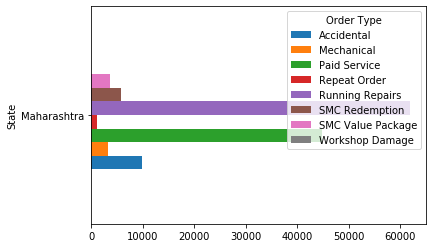

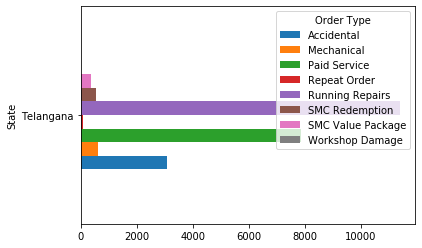

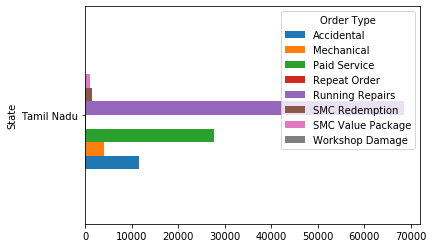

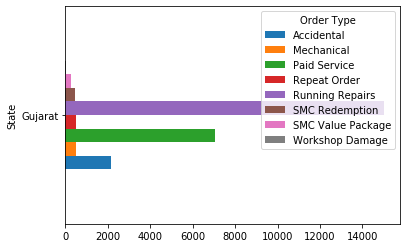

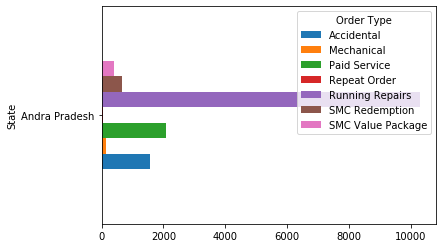

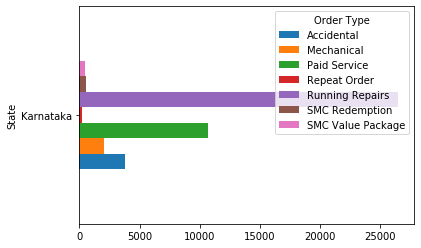

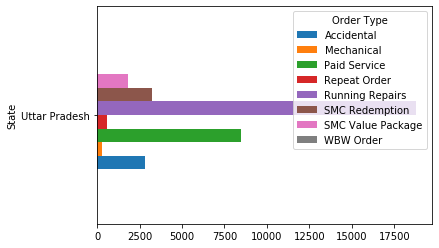

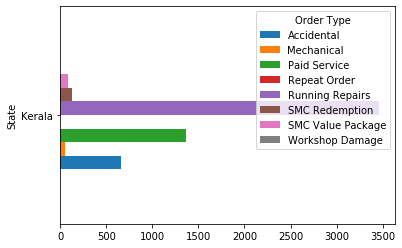

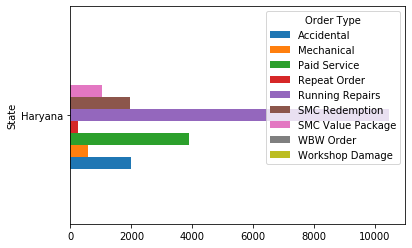

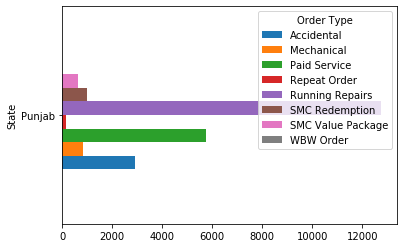

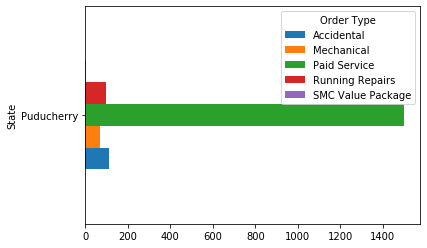

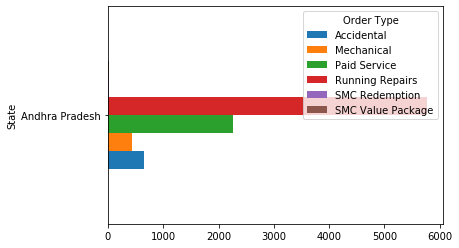

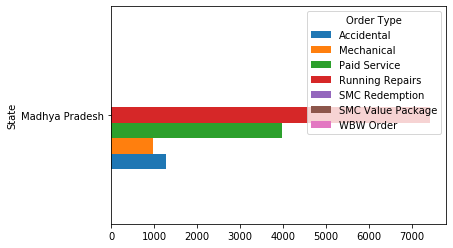

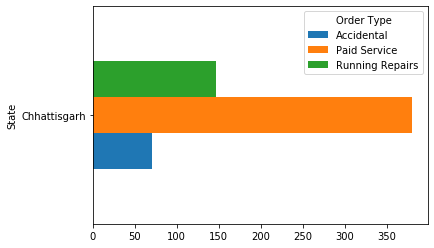

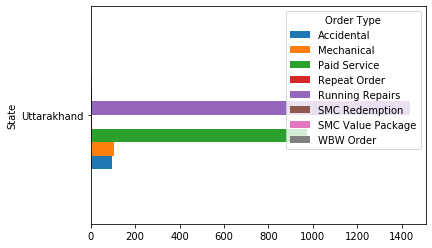

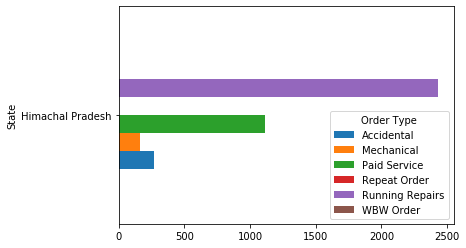

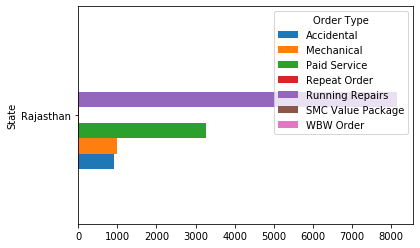

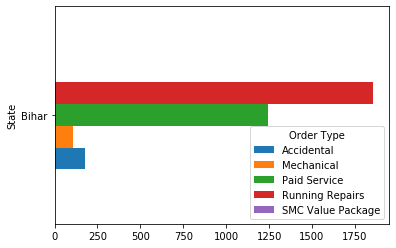

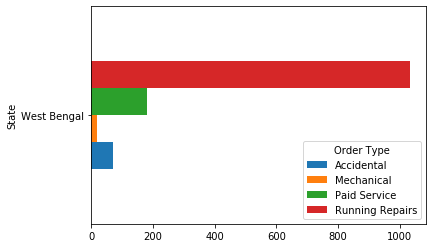

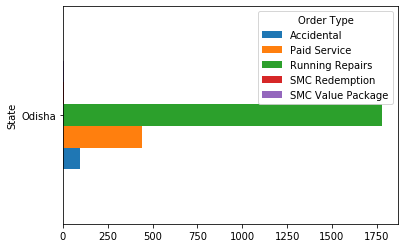

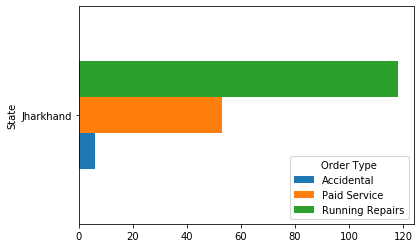

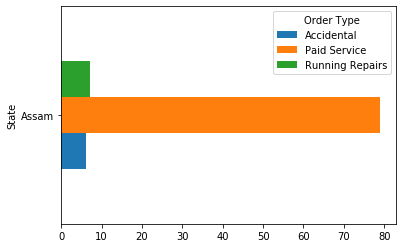

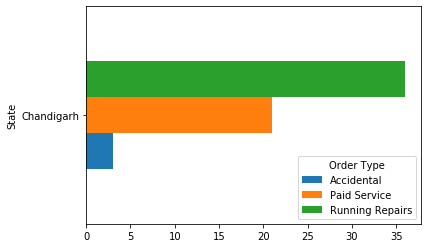

In [66]:
distr=df['State'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['State']==d].groupby(['State','Order Type'])['Order Type'].count())
    df[df['State']==d].groupby(['State','Order Type'])['Order Type'].count().unstack().plot(kind='barh')

   

In [62]:
distr=df['State'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['State']==d].groupby(['State','Plant','Order Type'])['Order Type'].count())
    #df[df['State']==d].groupby(['State','Order Type'])['Order Type'].count().unstack().plot(kind='barh')

   

State        Plant  Order Type     
Maharashtra  BC01   Accidental          968
                    Mechanical          230
                    Paid Service       5192
                    Repeat Order        139
                    Running Repairs    6435
                                       ... 
             X437   Paid Service         11
                    Running Repairs       9
             X444   Accidental            3
                    Paid Service         18
                    Running Repairs     121
Name: Order Type, Length: 195, dtype: int64
State      Plant  Order Type       
Telangana  BC04   Accidental            618
                  Paid Service         2039
                  Repeat Order            1
                  Running Repairs      1722
                  SMC Redemption        161
                  SMC Value Package     140
           BC05   Accidental           1834
                  Mechanical            224
                  Paid Service         4005
    

State           Plant  Order Type       
Madhya Pradesh  X060   Accidental             95
                       Mechanical            114
                       Paid Service          540
                       Running Repairs      1278
                X091   Accidental            144
                       Mechanical             57
                       Paid Service          732
                       Running Repairs        22
                X092   Accidental             28
                       Mechanical             45
                       Paid Service           54
                       Running Repairs       525
                       SMC Value Package       1
                X106   Accidental             57
                       Mechanical            124
                       Paid Service          203
                       Running Repairs       351
                X114   Accidental            137
                       Mechanical             48
                       Paid 

State      Plant  Order Type     
Jharkhand  X308   Accidental           6
                  Paid Service        53
                  Running Repairs    118
Name: Order Type, dtype: int64
State  Plant  Order Type     
Assam  X320   Accidental          6
              Paid Service       79
              Running Repairs     7
Name: Order Type, dtype: int64
State       Plant  Order Type     
Chandigarh  X161   Accidental          3
                   Paid Service       21
                   Running Repairs    36
Name: Order Type, dtype: int64


Plant  Order Type     
BC01   Accidental          968
       Mechanical          230
       Paid Service       5192
       Repeat Order        139
       Running Repairs    6435
                          ... 
X437   Paid Service         11
       Running Repairs       9
X444   Accidental            3
       Paid Service         18
       Running Repairs     121
Name: Order Type, Length: 195, dtype: int64
Plant  Order Type       
BC04   Accidental            618
       Paid Service         2039
       Repeat Order            1
       Running Repairs      1722
       SMC Redemption        161
       SMC Value Package     140
BC05   Accidental           1834
       Mechanical            224
       Paid Service         4005
       Repeat Order           64
       Running Repairs      6609
       SMC Redemption        370
       SMC Value Package     216
       Workshop Damage         1
X082   Accidental            273
       Mechanical            158
       Paid Service          555
      

Plant  Order Type       
X008   Accidental            110
       Mechanical             68
       Paid Service         1502
       Running Repairs        98
       SMC Value Package       1
Name: Order Type, dtype: int64
Plant  Order Type       
X037   Accidental             69
       Paid Service          437
       Running Repairs       808
X054   Accidental            167
       Mechanical            135
       Paid Service          710
       Running Repairs      1444
       SMC Redemption         27
       SMC Value Package      21
X055   Accidental              3
       Paid Service            8
       Running Repairs        12
X056   Accidental            116
       Mechanical             42
       Paid Service          276
       Running Repairs       412
X063   Accidental            110
       Mechanical            123
       Paid Service          299
       Running Repairs      1007
       SMC Value Package       4
X068   Accidental             85
       Mechanical           

Plant  Order Type     
X161   Accidental          3
       Paid Service       21
       Running Repairs    36
Name: Order Type, dtype: int64


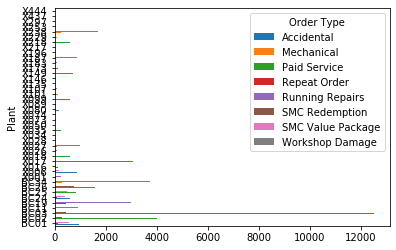

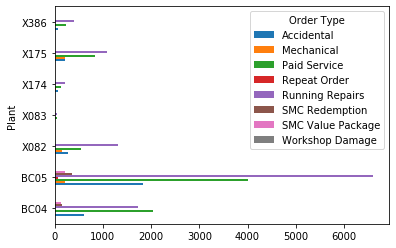

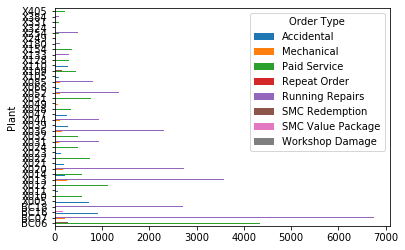

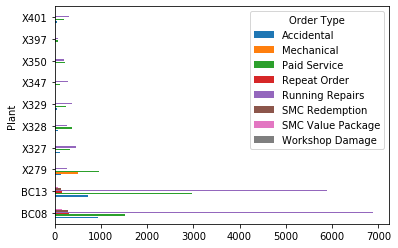

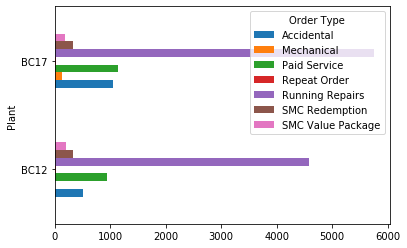

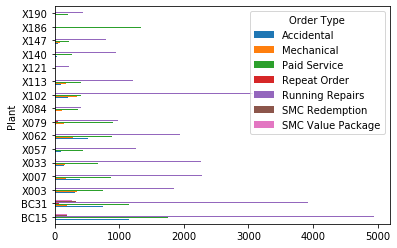

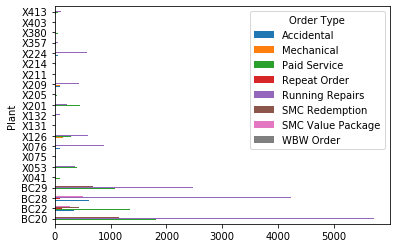

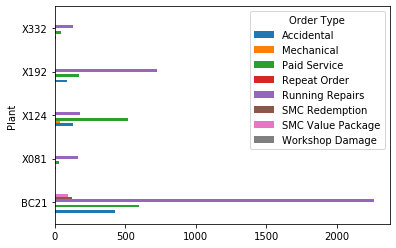

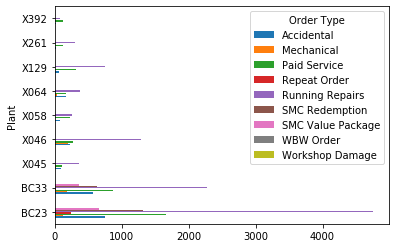

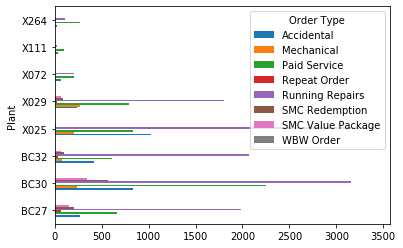

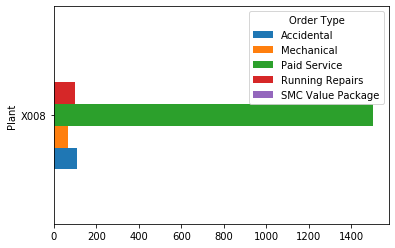

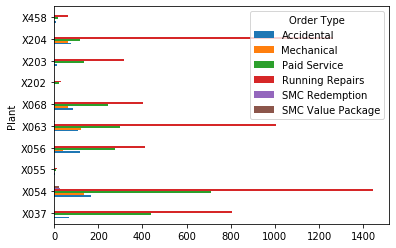

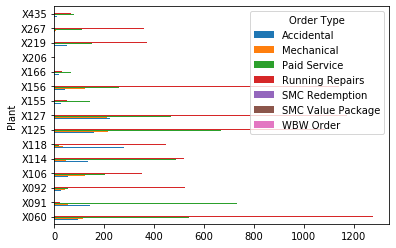

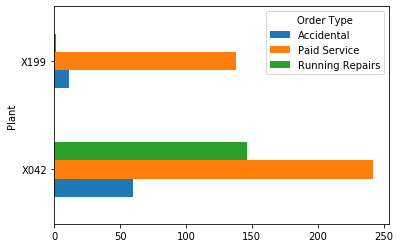

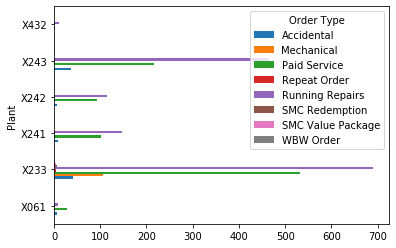

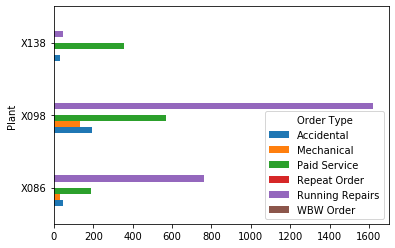

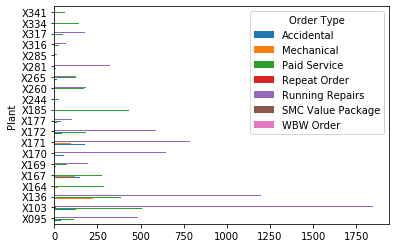

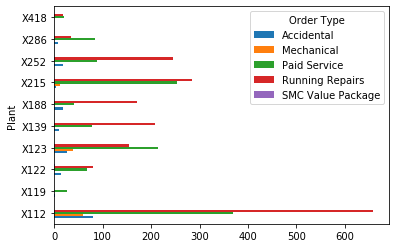

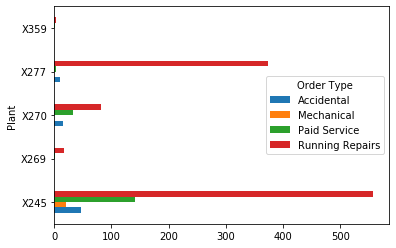

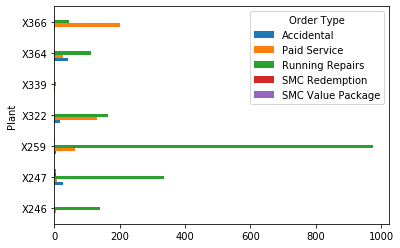

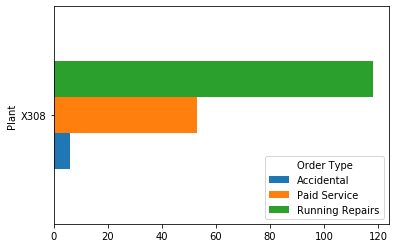

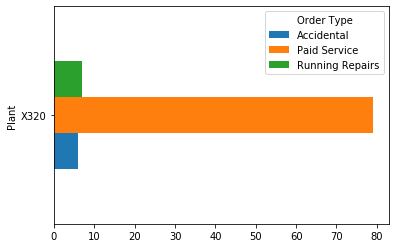

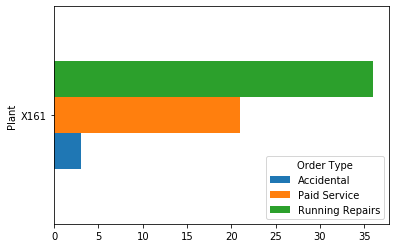

In [63]:
distr=df['State'].unique().tolist()
for d in distr:
    
    
    #print(District)
    
    print(df[df['State']==d].groupby(['Plant','Order Type'])['Order Type'].count())
    df[df['State']==d].groupby(['Plant','Order Type'])['Order Type'].count().unstack().plot(kind='barh')

In [50]:
df.columns

Index(['Area / Locality', 'CITY', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Parts Total', 'Pin code', 'Plant', 'Plant Name1', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID'],
      dtype='object')

In [67]:
df.groupby(["State"])[["Total Value"]].agg(['min','max','mean','median','sum'])

Total Value                                                
                         min        max         mean    median           sum
State                                                                       
Andhra Pradesh           0.0  159297.36  1143.019628     0.000  1.046434e+07
Andra Pradesh            0.0  343837.11  4199.229795  1001.290  6.386189e+07
Assam                    0.0       0.00     0.000000     0.000  0.000000e+00
Bihar                    0.0       0.00     0.000000     0.000  0.000000e+00
Chandigarh               0.0       0.00     0.000000     0.000  0.000000e+00
Chhattisgarh             0.0   61821.57  1054.988846     0.000  6.308833e+05
Gujarat                  0.0  229276.21  2904.153739   698.600  7.522049e+07
Haryana                  0.0  233826.19  2795.479286   199.140  5.638761e+07
Himachal Pradesh         0.0  153472.85   548.965589     0.000  2.181589e+06
Jharkhand                0.0       0.00     0.000000     0.000  0.000000e+00
Karnataka                0.0  375616.72  1764.035238     0.000  7.815735e+07
Kerala                   0.0  195039.42  2911.421085   414.220  1.674067e+07
Madhya Pradesh           0.0  137873.10   332.522601     0.000  4.552234e+06
Maharashtra              0.0  454981.59  2810.844306   698.600  3.660000e+08
Odisha                   0.0       0.00     0.000000     0.000  0.000000e+00
Puducherry               0.0  130807.24  2033.501900     0.000  3.617600e+06
Punjab                   0.0  565487.20  2821.635733   148.580  6.768822e+07
Rajasthan                0.0   13079.69    33.818961     0.000  4.513479e+05
Tamil Nadu               0.0  344200.29  3149.893429   199.140  3.601903e+08
Telangana                0.0  238939.28  4038.318640  1143.045  9.666119e+07
Uttar Pradesh            0.0  523677.36  2794.622596   249.220  1.005254e+08
Uttarakhand              0.0   25379.98    52.688569     0.000  1.384656e+05
West Bengal              0.0       0.00     0.000000     0.000  0.000000e+00

In [68]:
pd.DataFrame(df.groupby(["State"])["Total Value"].sum())

Total Value
State                         
Andhra Pradesh    1.046434e+07
Andra Pradesh     6.386189e+07
Assam             0.000000e+00
Bihar             0.000000e+00
Chandigarh        0.000000e+00
Chhattisgarh      6.308833e+05
Gujarat           7.522049e+07
Haryana           5.638761e+07
Himachal Pradesh  2.181589e+06
Jharkhand         0.000000e+00
Karnataka         7.815735e+07
Kerala            1.674067e+07
Madhya Pradesh    4.552234e+06
Maharashtra       3.660000e+08
Odisha            0.000000e+00
Puducherry        3.617600e+06
Punjab            6.768822e+07
Rajasthan         4.513479e+05
Tamil Nadu        3.601903e+08
Telangana         9.666119e+07
Uttar Pradesh     1.005254e+08
Uttarakhand       1.384656e+05
West Bengal       0.000000e+00

In [69]:
for ag in df.State.unique():
    print(ag)
    print(df[df.State == ag].groupby(['State','Order Type'])
          [['Total Value']].agg(['mean','sum']))
    print('---')

Maharashtra
                                Total Value              
                                       mean           sum
State       Order Type                                   
Maharashtra Accidental         10067.889299  9.953115e+07
            Mechanical             0.000000  0.000000e+00
            Paid Service        2964.491368  1.327647e+08
            Repeat Order           0.000000  0.000000e+00
            Running Repairs     1983.700719  1.228645e+08
            SMC Redemption        76.449725  4.455490e+05
            SMC Value Package   2928.745294  1.039412e+07
            Workshop Damage        0.000000  0.000000e+00
---
Telangana
                              Total Value             
                                     mean          sum
State     Order Type                                  
Telangana Accidental         10054.423720  30867080.82
          Mechanical             0.000000         0.00
          Paid Service        4033.536681  31800403.19
      

                            Total Value     
                                   mean  sum
State       Order Type                      
West Bengal Accidental              0.0  0.0
            Mechanical              0.0  0.0
            Paid Service            0.0  0.0
            Running Repairs         0.0  0.0
---
Odisha
                         Total Value     
                                mean  sum
State  Order Type                        
Odisha Accidental                0.0  0.0
       Paid Service              0.0  0.0
       Running Repairs           0.0  0.0
       SMC Redemption            0.0  0.0
       SMC Value Package         0.0  0.0
---
Jharkhand
                          Total Value     
                                 mean  sum
State     Order Type                      
Jharkhand Accidental              0.0  0.0
          Paid Service            0.0  0.0
          Running Repairs         0.0  0.0
---
Assam
                      Total Value     
                 

In [70]:
toporder = df.groupby(["Order Type"])[["Total Value"]].sum().sort_values("Total Value", ascending = False).iloc[:5]

In [71]:
toporder

Total Value
Order Type                     
Running Repairs    4.425518e+08
Accidental         4.414085e+08
Paid Service       3.873247e+08
SMC Value Package  3.050636e+07
SMC Redemption     1.674224e+06

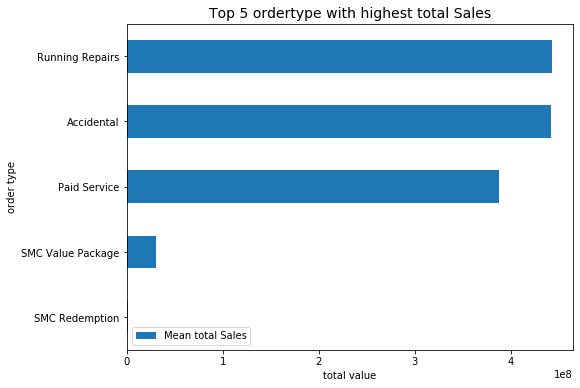

In [72]:
#plotting top 5 products by mean of net sales

toporder.sort_values('Total Value',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 ordertype with highest total Sales',fontdict={'fontsize':14})
plt.xlabel('total value')
plt.ylabel('order type')
plt.legend(['Mean total Sales'])

plt.show()

In [47]:
df.head()

Area / Locality      CITY Cust Type Customer No.     District  \
0        MAJIWADA     Thane    Retail        67849  Maharashtra   
1           THNAE     THNAE    Retail        84419  Maharashtra   
2           THANE  THANE[W]    Retail        81055  Maharashtra   
3           THNAE     THNAE    Retail        84419  Maharashtra   
4           THANE     THANE    Retail        18980  Maharashtra   

  Gate Pass Time Invoice Date Invoice Time  Job Card No JobCard Date  \
0       00:00:00   2015-01-02     11:30:36       168303   2014-12-13   
1       00:00:00   2015-01-03     10:07:32       173997   2015-01-02   
2       00:00:00   2015-01-03     11:12:57       173889   2015-01-02   
3       00:00:00   2015-01-03     11:40:44       174158   2015-01-03   
4       00:00:00   2015-01-03     12:07:17       173860   2015-01-02   

  JobCard Time  KMs Reading  Labour Total            Make  Misc Total  \
0     14:29:43        49317       1203.14  GENERAL MOTORS        0.00   
1     14:12:18        78584        804.26     TATA MOTORS      197.03   
2     11:40:44        33985        180.19   MARUTI SUZUKI        0.00   
3     10:12:32        78584          0.00     TATA MOTORS        0.00   
4     10:45:42        50057       1202.97         HYUNDAI      100.00   

         Model       ODN No.  OSL Total         Order Type  Parts Total  \
0        SPARK  7.005200e+09     500.06       Paid Service      2348.75   
1       INDICA  7.005200e+09       0.00  SMC Value Package         0.00   
2          ZEN  7.005200e+09       0.00    Running Repairs        52.95   
3       INDICA  7.005200e+09       0.00     SMC Redemption         0.00   
4  SANTRO XING  7.005200e+09     499.99       Paid Service       944.16   

   Pin code Plant Plant Name1 Print Status  Recovrbl Exp     Regn No  \
0    400601  BC01       THANE           NO           0.0  KA19MA1291   
1    400603  BC01       THANE           NO           0.0   MH43R3046   
2    400607  BC01       THANE           NO           0.0  AP09AX0582   
3    400603  BC01       THANE           NO           0.0   MH43R3046   
4    400603  BC01       THANE           NO           0.0  MH04CD9768   

  Technician Name  Total Amt Wtd Tax.  Total Value  User ID  
0          RUPESH             4051.95      4051.95  BC01FS1  
1        PRASHANT             1001.29      1001.29  BC01SA2  
2           IMRAN              233.14       233.14  BC01SA2  
3        PRASHANT                0.00         0.00  BC01SA2  
4        DAYANAND             2747.12      2747.12  BC01SA2

In [73]:
toporderplant = df.groupby(["Plant"])[["Total Value"]].sum().sort_values("Total Value", ascending = False).iloc[:10]

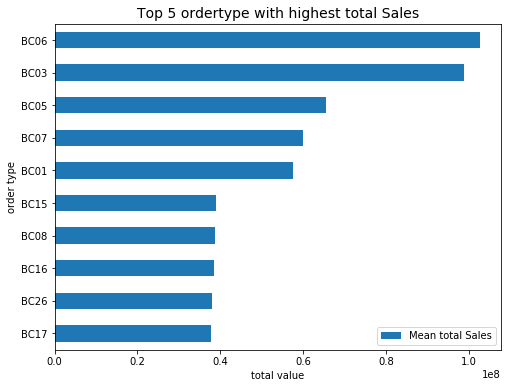

In [74]:
#plotting top 5 products by mean of net sales

toporderplant.sort_values('Total Value',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 ordertype with highest total Sales',fontdict={'fontsize':14})
plt.xlabel('total value')
plt.ylabel('order type')
plt.legend(['Mean total Sales'])

plt.show()

In [75]:
toporderplantsum = df.groupby(["Plant"])[["Total Value"]].sum().sort_values("Total Value", ascending = False).iloc[:5]

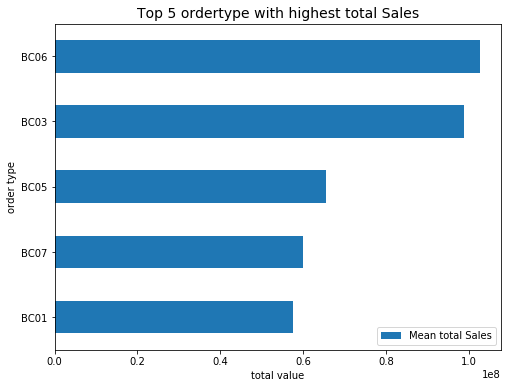

In [76]:
#plotting top 5 products by mean of net sales

toporderplantsum.sort_values('Total Value',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 ordertype with highest total Sales',fontdict={'fontsize':14})
plt.xlabel('total value')
plt.ylabel('order type')
plt.legend(['Mean total Sales'])

plt.show()

In [77]:
top15district=pd.DataFrame(df['State'].value_counts(sort=True).nlargest(15))

In [78]:
top15district.columns = ['state_counts']

In [79]:
top15district

state_counts
Maharashtra             130210
Tamil Nadu              114350
Karnataka                44306
Uttar Pradesh            35971
Gujarat                  25901
Punjab                   23989
Telangana                23936
Haryana                  20171
Andra Pradesh            15208
Madhya Pradesh           13690
Rajasthan                13346
Andhra Pradesh            9155
Kerala                    5750
Himachal Pradesh          3974
Bihar                     3390

In [79]:
top15districtri=top15district.copy()

In [80]:
top15districtri.reset_index(inplace=True)


In [81]:
top15districtri

index  state_counts
0        Maharashtra        130210
1         Tamil Nadu        114350
2          Karnataka         44306
3      Uttar Pradesh         35971
4            Gujarat         25901
5             Punjab         23989
6          Telangana         23936
7            Haryana         20171
8      Andra Pradesh         15208
9     Madhya Pradesh         13690
10         Rajasthan         13346
11    Andhra Pradesh          9155
12            Kerala          5750
13  Himachal Pradesh          3974
14             Bihar          3390

In [82]:
top10_district_list = list(top15districtri.sort_values(by='state_counts',ascending=False)[:5]['index'])
top10_district_list

['Maharashtra', 'Tamil Nadu', 'Karnataka', 'Uttar Pradesh', 'Gujarat']

In [83]:
for ag in top10_district_list:
   # print(ag)
    print(df[df.State == ag].groupby(['State','Order Type'])
          [['Total Value']].agg(['sum'])
         )
    print('---')

                                Total Value
                                        sum
State       Order Type                     
Maharashtra Accidental         9.953115e+07
            Mechanical         0.000000e+00
            Paid Service       1.327647e+08
            Repeat Order       0.000000e+00
            Running Repairs    1.228645e+08
            SMC Redemption     4.455490e+05
            SMC Value Package  1.039412e+07
            Workshop Damage    0.000000e+00
---
                               Total Value
                                       sum
State      Order Type                     
Tamil Nadu Accidental         1.285236e+08
           Mechanical         0.000000e+00
           Paid Service       1.042338e+08
           Repeat Order       0.000000e+00
           Running Repairs    1.237258e+08
           SMC Redemption     2.067620e+05
           SMC Value Package  3.500338e+06
           Workshop Damage    0.000000e+00
---
                             Total 

In [88]:
# Top 10 Products with highest Claim approval rate V 

ax = top15districtri.set_index('index').plot(kind='bar',figsize=(360,360))
plt.title('Top 10 Products with highest Claim approval rate',fontdict={'fontsize':14})
plt.ylabel('Percentage of Claims')
plt.legend(['Claim approvals'])
plt.ylim((0,75))

# dff_ri = dff.reset_index().set_index('product_name')


# ax = dff[    (dff['product_name'] == list_top10[0])|
#              (dff['product_name'] == list_top10[1])|
#              (dff['product_name'] == list_top10[2])|
#              (dff['product_name'] == list_top10[3])|
#              (dff['product_name'] == list_top10[4])|
#              (dff['product_name'] == list_top10[5])|
#              (dff['product_name'] == list_top10[6])|
#              (dff['product_name'] == list_top10[7])|
#              (dff['product_name'] == list_top10[8])|
#              (dff['product_name'] == list_top10[9])
#         ].unstack().plot(kind="bar", figsize=(10,8))

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+'%', (x,y+h+1))
plt.show()

ValueError: Image size of 20136x33975829 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 25920x25920 with 1 Axes>

In [84]:
df.head()

Area / Locality      CITY Cust Type Customer No.     District  \
0        MAJIWADA     Thane    Retail        67849  Maharashtra   
1           THNAE     THNAE    Retail        84419  Maharashtra   
2           THANE  THANE[W]    Retail        81055  Maharashtra   
3           THNAE     THNAE    Retail        84419  Maharashtra   
4           THANE     THANE    Retail        18980  Maharashtra   

  Gate Pass Time Invoice Date Invoice Time  Job Card No JobCard Date  \
0       00:00:00   2015-01-02     11:30:36       168303   2014-12-13   
1       00:00:00   2015-01-03     10:07:32       173997   2015-01-02   
2       00:00:00   2015-01-03     11:12:57       173889   2015-01-02   
3       00:00:00   2015-01-03     11:40:44       174158   2015-01-03   
4       00:00:00   2015-01-03     12:07:17       173860   2015-01-02   

  JobCard Time  KMs Reading  Labour Total            Make  Misc Total  \
0     14:29:43        49317       1203.14  GENERAL MOTORS        0.00   
1     14:12:18        78584        804.26     TATA MOTORS      197.03   
2     11:40:44        33985        180.19   MARUTI SUZUKI        0.00   
3     10:12:32        78584          0.00     TATA MOTORS        0.00   
4     10:45:42        50057       1202.97         HYUNDAI      100.00   

         Model       ODN No.  OSL Total         Order Type  Parts Total  \
0        SPARK  7.005200e+09     500.06       Paid Service      2348.75   
1       INDICA  7.005200e+09       0.00  SMC Value Package         0.00   
2          ZEN  7.005200e+09       0.00    Running Repairs        52.95   
3       INDICA  7.005200e+09       0.00     SMC Redemption         0.00   
4  SANTRO XING  7.005200e+09     499.99       Paid Service       944.16   

   Pin code Plant Plant Name1 Print Status  Recovrbl Exp     Regn No  \
0    400601  BC01       THANE           NO           0.0  KA19MA1291   
1    400603  BC01       THANE           NO           0.0   MH43R3046   
2    400607  BC01       THANE           NO           0.0  AP09AX0582   
3    400603  BC01       THANE           NO           0.0   MH43R3046   
4    400603  BC01       THANE           NO           0.0  MH04CD9768   

  Technician Name  Total Amt Wtd Tax.  Total Value  User ID  
0          RUPESH             4051.95      4051.95  BC01FS1  
1        PRASHANT             1001.29      1001.29  BC01SA2  
2           IMRAN              233.14       233.14  BC01SA2  
3        PRASHANT                0.00         0.00  BC01SA2  
4        DAYANAND             2747.12      2747.12  BC01SA2

In [216]:
df.columns

Index(['Area / Locality', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Parts Total', 'Pin code', 'Plant', 'Plant Name1', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'City', 'State'],
      dtype='object')

In [217]:
df['Invoice Date']

0         2015-01-02
1         2015-01-03
2         2015-01-03
3         2015-01-03
4         2015-01-03
             ...    
492309    2016-10-28
492310    2016-10-28
492311    2016-10-28
492312    2016-10-28
492313    2016-10-29
Name: Invoice Date, Length: 492314, dtype: object

In [99]:
df['month'] = pd.DatetimeIndex(df['Invoice Date']).month


In [100]:
df.head()

Area / Locality Cust Type Customer No.     District Gate Pass Time  \
0         Missing    Retail       E12734  Maharashtra       00:00:00   
1         Missing    Retail       E12734  Maharashtra       00:00:00   
2         Missing    Retail       E12734  Maharashtra       00:00:00   
3         Missing    Retail       E12734  Maharashtra       00:00:00   
4         Missing    Retail       E12734  Maharashtra       00:00:00   

  Invoice Date  Invoice No Invoice Time  Job Card No JobCard Date  \
0   2015-01-03  7005200022     19:40:26       174232   2015-01-03   
1   2014-06-18  7000122741     18:46:39       123388   2014-06-16   
2   2014-12-30  7000174274     13:36:15       171517   2014-12-25   
3   2012-05-22  7000002754     17:02:25         1547   2012-04-28   
4   2012-08-25  7000008998     12:35:07         9071   2012-08-25   

  JobCard Time  KMs Reading  Labour Total           Make  Misc Total Model  \
0     11:34:27        53311       1845.00  MARUTI SUZUKI       50.00  ALTO   
1     20:55:25        45588       1317.37  MARUTI SUZUKI       50.00  ALTO   
2     11:35:20        53099          0.00  MARUTI SUZUKI        0.00  ALTO   
3     10:54:20        25905        825.15  MARUTI SUZUKI       50.01  ALTO   
4     11:10:19        29173          0.00  MARUTI SUZUKI        0.00  ALTO   

        ODN No.  OSL Total       Order Type  Parts Total  Pin code Plant  \
0  7.005200e+09        0.0     Paid Service      1562.27    400607  BC01   
1  7.000123e+09        0.0     Paid Service      2159.64    400607  BC01   
2  7.000174e+09        0.0     Paid Service         0.00    400607  BC01   
3  7.000003e+09        0.0     Paid Service      1297.52    400607  BC01   
4  7.000009e+09        0.0  Running Repairs       293.33    400607  BC01   

  Plant Name1 Print Status  Recovrbl Exp    Regn No  Service Advisor Name  \
0       THANE           NO           0.0  MH43V1363                   0.0   
1       THANE           NO           0.0  MH43V1363                   0.0   
2       THANE           NO           0.0  MH43V1363                   0.0   
3       THANE           NO           0.0  MH43V1363                   0.0   
4       THANE           NO           0.0  MH43V1363                   0.0   

  Technician Name  Total Amt Wtd Tax.  Total Value  User ID   City  \
0          RUPESH             3457.27      3457.27  BC01SA1  Thane   
1         harshad             3527.01      3527.01  BC01SA2  Thane   
2        DAYANAND                0.00         0.00  BC01SA1  Thane   
3         Missing             2172.68      2172.68  BC01SA1  Thane   
4         Missing              293.33       293.33  BC01SA1  Thane   

         State          source  status      desg  month  
0  Maharashtra  Camp - Outdoor  Single  Director      1  
1  Maharashtra  Camp - Outdoor  Single  Director      6  
2  Maharashtra  Camp - Outdoor  Single  Director     12  
3  Maharashtra  Camp - Outdoor  Single  Director      5  
4  Maharashtra  Camp - Outdoor  Single  Director      8

In [101]:
df.groupby(["month"])[["Total Value"]].agg(['min','max','mean','median','sum'])

Total Value                                               
              min        max         mean    median          sum
month                                                           
1             0.0  125176.63  5179.438815  2692.580  19055155.40
2             0.0  102011.11  4741.061428  2041.200  20652063.58
3             0.0  102817.06  4111.383751  2366.960  12889188.06
4             0.0  199354.80  5502.331599  2419.890  28898245.56
5             0.0   76957.12  3908.314564  2437.400  25216445.57
6             0.0  238265.62  8289.378103  2449.800  46138678.52
7             0.0  118127.32  4741.959885  2746.420  27697787.69
8             0.0  128095.98  5408.925876  2932.910  29900542.24
9             0.0  101603.72  4866.613239  2853.475  23165079.02
10            0.0   92733.28  5052.390317  2781.360  23756339.27
11            0.0  198980.80  5921.367894  3299.220  23229526.25
12            0.0  119374.17  5702.363414  3413.330  27662164.92

In [102]:
df.groupby(['Plant',"month"])[["Total Value"]].agg(['mean','sum'])

Total Value            
                    mean         sum
Plant month                         
BC01  1      2681.335151   801719.21
      2      3910.225122   320638.46
      3      2833.127853   461799.84
      4      6416.215157  2649896.86
      5      5156.665119  2165799.35
...                  ...         ...
X401  8         0.000000        0.00
X405  7         0.000000        0.00
      8         0.000000        0.00
      9         0.000000        0.00
      10        0.000000        0.00

[476 rows x 2 columns]

In [87]:
month=[1,2,3,4,5,6,7,8,9,10,11,12]

In [88]:
for ag in month:
    print(ag)
    print(df[df.month == ag].groupby(['Plant',"month"])[["Total Value"]].agg(['sum'])    
         )
    print('---')

1
            Total Value
                    sum
Plant month            
BC01  1      3592133.34
BC02  1      2706877.21
BC03  1      7554252.64
BC04  1      2088925.18
BC05  1      4235895.48
...                 ...
X128  1            0.00
X136  1            0.00
X174  1            0.00
X175  1            0.00
X238  1            0.00

[106 rows x 1 columns]
---
2
            Total Value
                    sum
Plant month            
BC01  2      2496438.41
BC02  2      2882116.12
BC03  2      6270023.12
BC04  2      2268646.76
BC05  2      4467591.13
...                 ...
X171  2            0.00
X174  2            0.00
X175  2            0.00
X233  2            0.00
X238  2            0.00

[111 rows x 1 columns]
---
3
            Total Value
                    sum
Plant month            
BC01  3      2829081.28
BC02  3      2357066.79
BC03  3      6602392.04
BC04  3      1262920.03
BC05  3      4580103.65
...                 ...
X175  3            0.00
X209  3            0.00
X2

In [89]:
top15plant=pd.DataFrame(df['Plant'].value_counts(sort=True).nlargest(15))

In [90]:
top15plant.columns = ['plant_counts']

In [226]:
top15plant

plant_counts
BC03         28615
BC01         14483
BC05         13323
BC26         13253
BC06         12752
BC07         11815
BC20         10259
BC08         10146
BC13          9990
BC23          9521
BC17          8631
BC15          8343
BC02          8209
BC28          8053
BC34          7483

In [91]:
top15plantreset=top15plant.copy()

In [92]:
top15plantreset.reset_index(inplace=True)


In [93]:
top10_plant_list = list(top15plantreset.sort_values(by='plant_counts',ascending=False)[:10]['index'])
top10_plant_list

['BC03',
 'BC01',
 'BC05',
 'BC26',
 'BC06',
 'BC07',
 'BC20',
 'BC08',
 'BC13',
 'BC23']

In [95]:
for ag in top10_plant_list:
    print(ag)
    print(df[df.Plant == ag].groupby(['Plant','month'])
          [['Total Value']].agg(['mean','sum'])
         )
    print('---')

BC03
             Total Value            
                    mean         sum
Plant month                         
BC03  1      3408.958773  7554252.64
      2      2949.211251  6270023.12
      3      2922.705640  6602392.04
      4      2874.827273  8201882.21
      5      3325.354548  9161351.78
      6      3491.619955  8561452.13
      7      3933.219632  9620655.22
      8      3709.891478  7957717.22
      9      3500.002718  7570505.88
      10     3692.656258  8703590.80
      11     3823.502098  8946994.91
      12     3872.739181  9693466.17
---
BC01
             Total Value            
                    mean         sum
Plant month                         
BC01  1      3021.138217  3592133.34
      2      2563.078450  2496438.41
      3      2530.484150  2829081.28
      4      4119.763094  5631716.15
      5      4360.623155  5210944.67
      6      4528.397879  6000127.19
      7      4575.011588  5993265.18
      8      4531.127529  5392041.76
      9      4427.748544

In [92]:
for ag in top10_district_list:
   # print(ag)
    print(df[df.State == ag].groupby(['State','Plant'])
          [['Total Value']].agg(['sum'])
         )
    print('---')

                    Total Value
                            sum
State       Plant              
Maharashtra BC01   5.766792e+07
            BC02   3.123834e+07
            BC03   9.884428e+07
            BC11   1.505036e+07
            BC19   2.307678e+07
            BC24   2.060944e+07
            BC25   1.939645e+07
            BC26   3.797383e+07
            BC34   1.923765e+07
            X001   5.146370e+06
            X006   1.361709e+07
            X016   4.543620e+06
            X017   2.043636e+06
            X018   3.108941e+06
            X026   1.116489e+06
            X027   4.821066e+06
            X028   1.303866e+06
            X034   3.504889e+06
            X035   1.654401e+06
            X050   0.000000e+00
            X073   0.000000e+00
            X074   4.915410e+05
            X080   8.063704e+05
            X089   0.000000e+00
            X099   0.000000e+00
            X101   7.466933e+05
            X107   0.000000e+00
            X135   0.000000e+00
        

In [93]:
for ag in top10_district_list:
   # print(ag)
    print(df[df.State == ag].groupby(['State','Plant'])
          [['Plant']].agg(['count'])
         )
    print('---')

                   Plant
                   count
State       Plant       
Maharashtra BC01   14483
            BC02    8209
            BC03   28615
            BC11    2655
            BC19    5812
            BC24    5888
            BC25    5103
            BC26   13253
            BC34    7483
            X001     883
            X006    6505
            X016    1929
            X017    3328
            X018    1328
            X026     391
            X027    1955
            X028     746
            X034    3443
            X035    2385
            X050     537
            X073     359
            X074     256
            X080    2525
            X089      61
            X099    1336
            X101    1314
            X107     191
            X135     124
            X146     704
            X149     728
            X173     657
            X183      92
            X187    1373
            X196      81
            X217     200
            X218     868
            X229     606


In [90]:
df.groupby(['State',"Plant"])[["Plant"]].agg(['count'])

Plant
                     count
State          Plant      
Andhra Pradesh X037   1314
               X054   2504
               X055     23
               X056    846
               X063   1543
...                    ...
West Bengal    X245    764
               X269     19
               X270    130
               X277    388
               X359      5

[242 rows x 1 columns]

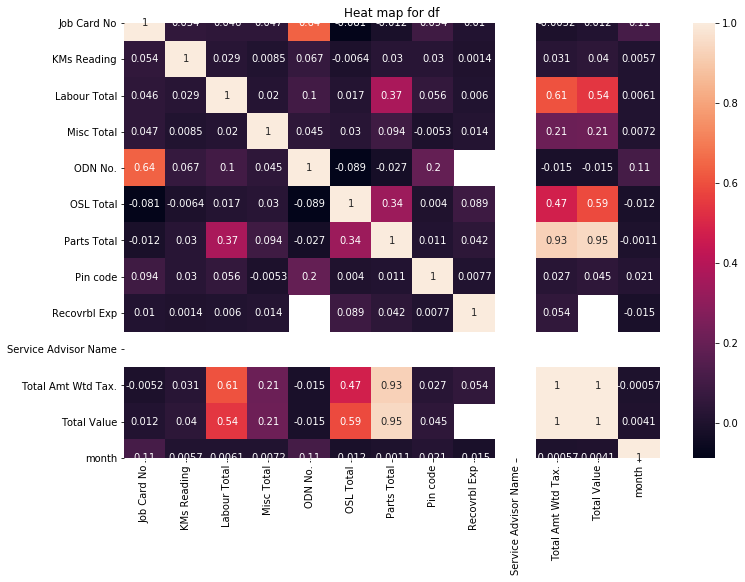

In [232]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Heat map for df")
plt.show()

In [ ]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="State", locationmode=' names', 
                  color=col, hover_name="Country/Region", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [38]:
df.columns

Index(['Area / Locality', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Parts Total', 'Pin code', 'Plant', 'Plant Name1', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'City', 'State'],
      dtype='object')

In [53]:
df.Make.value_counts()

MARUTI SUZUKI           147102
MAHINDRA &  MAHINDRA     87356
HYUNDAI                  85342
TATA MOTORS              58034
GENERAL MOTORS           29092
FORD                     21616
TOYOTA                   19466
HONDA                    15464
SKODA                     6515
FIAT                      6437
VOLKSWAGEN                6150
RENAULT                   3429
NISSAN                    3090
MITSUBISHI MOTORS         1427
DAEWOO                     392
BMW                        257
MERCEDES BENZ              256
AUDI                       220
HINDUSTAN MOTORS           219
FORCE                      207
PREMIER AUTOMOBILES         93
SONALIKA                    87
LAND ROVER                  21
VOLVO                       19
SAN MOTORS                   8
JEEP                         7
PORCHE                       6
MORRIS                       2
Name: Make, dtype: int64

In [54]:
df.isnull().sum()

Area / Locality          23890
Cust Type                    0
Customer No.                 0
District                     0
Gate Pass Time               0
Invoice Date                 0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model                     1525
ODN No.                      0
OSL Total                    0
Order Type                   0
Parts Total                  0
Pin code                     0
Plant                        0
Plant Name1                  0
Print Status                 0
Recovrbl Exp                 0
Regn No                     16
Service Advisor Name         0
Technician Name         236834
Total Amt Wtd Tax.           0
Total Value                  0
User ID                      0
City                         0
State                        0
n       

In [40]:
df['User ID'].nunique()

557

In [41]:
df['User ID'].nunique().count()

AttributeError: 'int' object has no attribute 'count'

In [42]:
df.nunique()

Area / Locality          65509
Cust Type                    7
Customer No.            253484
District                    36
Gate Pass Time           23874
Invoice Date              1642
Invoice Time             46697
Job Card No             489329
JobCard Date              1643
JobCard Time             42971
KMs Reading             159473
Labour Total            137154
Make                        28
Misc Total               17728
Model                      245
ODN No.                 295029
OSL Total                29419
Order Type                   9
Parts Total             212765
Pin code                 11810
Plant                      242
Plant Name1                244
Print Status                 2
Recovrbl Exp               192
Regn No                 260324
Service Advisor Name         1
Technician Name          15044
Total Amt Wtd Tax.      258071
Total Value             168861
User ID                    557
City                       196
State                       23
dtype: i

In [97]:
df['n']=1

In [98]:
df.columns

Index(['Area / Locality', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice No', 'Invoice Time',
       'Job Card No', 'JobCard Date', 'JobCard Time', 'KMs Reading',
       'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.', 'OSL Total',
       'Order Type', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Print Status', 'Recovrbl Exp', 'Regn No', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'City', 'State',
       'month', 'n'],
      dtype='object')

In [99]:
matrix = df.pivot_table(index='Regn No', columns='Make', values='n')


In [100]:
matrix.isnull().sum()

Make
AUDI                    260197
BMW                     260160
DAEWOO                  260102
FIAT                    256994
FORCE                   260180
FORD                    248847
GENERAL MOTORS          245926
HINDUSTAN MOTORS        260179
HONDA                   251749
HYUNDAI                 217092
JEEP                    260319
LAND ROVER              260306
MAHINDRA &  MAHINDRA    218312
MARUTI SUZUKI           178540
MERCEDES BENZ           260136
MITSUBISHI MOTORS       259498
MORRIS                  260323
NISSAN                  258454
PORCHE                  260320
PREMIER AUTOMOBILES     260271
RENAULT                 258257
SAN MOTORS              260318
SKODA                   256734
SONALIKA                260272
TATA MOTORS             229140
TOYOTA                  248999
VOLKSWAGEN              256746
VOLVO                   260306
dtype: int64

In [101]:
matrix.fillna(0, inplace=True)


In [102]:
matrix.isnull().sum()

Make
AUDI                    0
BMW                     0
DAEWOO                  0
FIAT                    0
FORCE                   0
FORD                    0
GENERAL MOTORS          0
HINDUSTAN MOTORS        0
HONDA                   0
HYUNDAI                 0
JEEP                    0
LAND ROVER              0
MAHINDRA &  MAHINDRA    0
MARUTI SUZUKI           0
MERCEDES BENZ           0
MITSUBISHI MOTORS       0
MORRIS                  0
NISSAN                  0
PORCHE                  0
PREMIER AUTOMOBILES     0
RENAULT                 0
SAN MOTORS              0
SKODA                   0
SONALIKA                0
TATA MOTORS             0
TOYOTA                  0
VOLKSWAGEN              0
VOLVO                   0
dtype: int64

In [103]:
matrix.reset_index(inplace=True)


In [81]:
print(matrix.head())


Make   Regn No  AUDI  BMW  DAEWOO  FIAT  FORCE  FORD  GENERAL MOTORS  \
0            0   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
1           00   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
2       002484   0.0  0.0     0.0   0.0    0.0   0.0             1.0   
3     00250994   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
4        00317   0.0  0.0     0.0   0.0    0.0   0.0             0.0   

Make  HINDUSTAN MOTORS  HONDA  HYUNDAI  JEEP  LAND ROVER  \
0                  0.0    0.0      0.0   0.0         0.0   
1                  0.0    0.0      0.0   0.0         0.0   
2                  0.0    0.0      0.0   0.0         0.0   
3                  0.0    0.0      0.0   0.0         0.0   
4                  0.0    0.0      0.0   0.0         0.0   

Make  MAHINDRA &  MAHINDRA  MARUTI SUZUKI  MERCEDES BENZ  MITSUBISHI MOTORS  \
0                      1.0            0.0            0.0                0.0   
1                      1.0            0.0       

In [104]:
from sklearn.cluster import KMeans


In [105]:
cluster = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)


In [106]:
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[1:]])


In [107]:
print(matrix.head())


Make   Regn No  AUDI  BMW  DAEWOO  FIAT  FORCE  FORD  GENERAL MOTORS  \
0            0   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
1           00   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
2       002484   0.0  0.0     0.0   0.0    0.0   0.0             1.0   
3     00250994   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
4        00317   0.0  0.0     0.0   0.0    0.0   0.0             0.0   

Make  HINDUSTAN MOTORS  HONDA  HYUNDAI  JEEP  LAND ROVER  \
0                  0.0    0.0      0.0   0.0         0.0   
1                  0.0    0.0      0.0   0.0         0.0   
2                  0.0    0.0      0.0   0.0         0.0   
3                  0.0    0.0      0.0   0.0         0.0   
4                  0.0    0.0      0.0   0.0         0.0   

Make  MAHINDRA &  MAHINDRA  MARUTI SUZUKI  MERCEDES BENZ  MITSUBISHI MOTORS  \
0                      1.0            0.0            0.0                0.0   
1                      1.0            0.0       

In [108]:
from sklearn.decomposition import PCA


In [109]:
pca = PCA(n_components=2, random_state=0)


In [110]:
matrix['x'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,0]
matrix['y'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,1]



In [111]:
matrix.iloc[:,:]

Make       Regn No  AUDI  BMW  DAEWOO  FIAT  FORCE  FORD  GENERAL MOTORS  \
0                0   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
1               00   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
2           002484   0.0  0.0     0.0   0.0    0.0   0.0             1.0   
3         00250994   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
4            00317   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
...            ...   ...  ...     ...   ...    ...   ...             ...   
260320   XXXXXXXXX   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
260321  XXXXXXXXXX   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
260322         YNR   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
260323     ZXC2321   0.0  0.0     0.0   0.0    0.0   0.0             0.0   
260324  ÀP26AU1102   0.0  0.0     0.0   0.0    0.0   0.0             0.0   

Make    HINDUSTAN MOTORS  HONDA  HYUNDAI  JEEP  LAND ROVER  \
0                    0.0    0.0      0.0   0.0         0.0   
1                    0.0    0.0      0.0   0.0         0.0   
2                    0.0    0.0      0.0   0.0         0.0   
3                    0.0    0.0      0.0   0.0         0.0   
4                    0.0    0.0      0.0   0.0         0.0   
...                  ...    ...      ...   ...         ...   
260320               0.0    0.0      0.0   0.0         0.0   
260321               0.0    0.0      0.0   0.0         0.0   
260322               0.0    0.0      0.0   0.0         0.0   
260323               0.0    0.0      0.0   0.0         0.0   
260324               0.0    0.0      0.0   0.0         0.0   

Make    MAHINDRA &  MAHINDRA  MARUTI SUZUKI  MERCEDES BENZ  MITSUBISHI MOTORS  \
0                        1.0            0.0            0.0                0.0   
1                        1.0            0.0            0.0                0.0   
2                        0.0            0.0            0.0                0.0   
3                        0.0            1.0            0.0                0.0   
4                        0.0            1.0            0.0                0.0   
...                      ...            ...            ...                ...   
260320                   1.0            0.0            0.0                0.0   
260321                   1.0            0.0            0.0                0.0   
260322                   1.0            0.0            0.0                0.0   
260323                   1.0            0.0            0.0                0.0   
260324                   0.0            0.0            0.0                0.0   

Make    MORRIS  NISSAN  PORCHE  PREMIER AUTOMOBILES  RENAULT  SAN MOTORS  \
0          0.0     0.0     0.0                  0.0      0.0         0.0   
1          0.0     0.0     0.0                  0.0      0.0         0.0   
2          0.0     0.0     0.0                  0.0      0.0         0.0   
3          0.0     0.0     0.0                  0.0      0.0         0.0   
4          0.0     0.0     0.0                  0.0      0.0         0.0   
...        ...     ...     ...                  ...      ...         ...   
260320     0.0     0.0     0.0                  0.0      0.0         0.0   
260321     0.0     0.0     0.0                  0.0      0.0         0.0   
260322     0.0     0.0     0.0                  0.0      0.0         0.0   
260323     0.0     0.0     0.0                  0.0      0.0         0.0   
260324     0.0     0.0     0.0                  0.0      0.0         0.0   

Make    SKODA  SONALIKA  TATA MOTORS  TOYOTA  VOLKSWAGEN  VOLVO  cluster  \
0         0.0       0.0          0.0     0.0         0.0    0.0        1   
1         0.0       0.0          0.0     0.0         0.0    0.0        1   
2         0.0       0.0          0.0     0.0         0.0    0.0        5   
3         0.0       0.0          0.0     0.0         0.0    0.0        2   
4         0.0       0.0          0.0     0.0         0.0    0.0        2   


In [112]:
matrix.columns

Index(['Regn No', 'AUDI', 'BMW', 'DAEWOO', 'FIAT', 'FORCE', 'FORD',
       'GENERAL MOTORS', 'HINDUSTAN MOTORS', 'HONDA', 'HYUNDAI', 'JEEP',
       'LAND ROVER', 'MAHINDRA &  MAHINDRA', 'MARUTI SUZUKI', 'MERCEDES BENZ',
       'MITSUBISHI MOTORS', 'MORRIS', 'NISSAN', 'PORCHE',
       'PREMIER AUTOMOBILES', 'RENAULT', 'SAN MOTORS', 'SKODA', 'SONALIKA',
       'TATA MOTORS', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'cluster', 'x', 'y'],
      dtype='object', name='Make')

In [113]:
clusters = matrix.iloc[:,[0,29,30,31]]


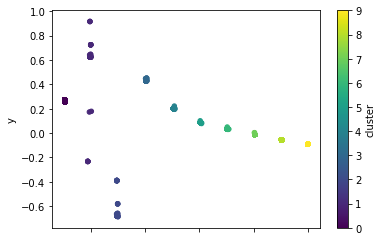

In [114]:
clusters.plot.scatter(x='x', y='y', c='cluster', colormap='viridis')


In [115]:
clusters

Make       Regn No  cluster         x         y
0                0        1 -2.022469  0.626560
1               00        1 -2.022469  0.626560
2           002484        5  2.044829  0.085513
3         00250994        2 -1.031180 -0.678501
4            00317        2 -1.031180 -0.678501
...            ...      ...       ...       ...
260320   XXXXXXXXX        1 -2.022469  0.626560
260321  XXXXXXXXXX        1 -2.022469  0.626560
260322         YNR        1 -2.022469  0.626560
260323     ZXC2321        1 -2.022469  0.626560
260324  ÀP26AU1102        4  1.057331  0.202257

[260325 rows x 4 columns]

In [71]:
df.shape

(492314, 33)

In [116]:
data = pd.merge(clusters, df)


In [117]:
data.shape


(492314, 37)

In [118]:
data.columns

Index(['Regn No', 'cluster', 'x', 'y', 'Area / Locality', 'Cust Type',
       'Customer No.', 'District', 'Gate Pass Time', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'ODN No.', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Print Status', 'Recovrbl Exp',
       'Technician Name', 'Total Amt Wtd Tax.', 'Total Value', 'User ID',
       'City', 'State', 'month', 'n'],
      dtype='object')

In [119]:
discount = {} 



In [120]:
for val in data.cluster.unique():
    new_df = data[data.cluster == val]
    counts = new_df['Total Value'].values.sum() / len(new_df)
    discount[val] = counts


In [121]:
cluster_discount = max(discount, key=discount.get)


In [122]:
print(cluster_discount)


1


In [80]:
data[['Make','cluster']]

Make  cluster
0       MAHINDRA &  MAHINDRA        4
1       MAHINDRA &  MAHINDRA        4
2             GENERAL MOTORS        5
3              MARUTI SUZUKI        1
4              MARUTI SUZUKI        1
...                      ...      ...
492293  MAHINDRA &  MAHINDRA        4
492294  MAHINDRA &  MAHINDRA        4
492295  MAHINDRA &  MAHINDRA        4
492296           TATA MOTORS        3
492297           TATA MOTORS        3

[492298 rows x 2 columns]

In [82]:
df.columns

Index(['Area / Locality', 'Cust Type', 'Customer No.', 'District',
       'Gate Pass Time', 'Invoice Date', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Parts Total', 'Pin code', 'Plant', 'Plant Name1', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'City', 'State', 'n'],
      dtype='object')

In [83]:
df.nunique()

Area / Locality          65509
Cust Type                    7
Customer No.            253484
District                    36
Gate Pass Time           23874
Invoice Date              1642
Invoice Time             46697
Job Card No             489329
JobCard Date              1643
JobCard Time             42971
KMs Reading             159473
Labour Total            137154
Make                        28
Misc Total               17728
Model                      245
ODN No.                 295029
OSL Total                29419
Order Type                   9
Parts Total             212765
Pin code                 11810
Plant                      242
Plant Name1                244
Print Status                 2
Recovrbl Exp               192
Regn No                 260324
Service Advisor Name         1
Technician Name          15044
Total Amt Wtd Tax.      258071
Total Value             168861
User ID                    557
City                       196
State                       23
n       

In [84]:
df['Customer No.']

0          67849
1          84419
2          81055
3          84419
4          18980
           ...  
492309    260661
492310    260820
492311    258119
492312    260771
492313    261348
Name: Customer No., Length: 492314, dtype: object

In [86]:
df['State'].value_counts()

Maharashtra         130210
Tamil Nadu          114350
Karnataka            44306
Uttar Pradesh        35971
Gujarat              25901
Punjab               23989
Telangana            23936
Haryana              20171
Andra Pradesh        15208
Madhya Pradesh       13690
Rajasthan            13346
Andhra Pradesh        9155
Kerala                5750
Himachal Pradesh      3974
Bihar                 3390
Uttarakhand           2628
Odisha                2327
Puducherry            1779
West Bengal           1306
Chhattisgarh           598
Jharkhand              177
Assam                   92
Chandigarh              60
Name: State, dtype: int64

In [124]:
state_cust_data=df[['State','Customer No.']].drop_duplicates()

In [53]:
state_cust_data.groupby(['State'])['Customer No.'].aggregate('count')

NameError: name 'state_cust_data' is not defined

In [126]:
state_cust_data.groupby(['State'])['Customer No.'].aggregate('count').reset_index().sort_values('Customer No.', ascending=False)

State  Customer No.
13       Maharashtra         60444
18        Tamil Nadu         57921
10         Karnataka         24795
20     Uttar Pradesh         18557
6            Gujarat         13186
19         Telangana         12388
16            Punjab         11573
7            Haryana          9799
12    Madhya Pradesh          9274
17         Rajasthan          9090
1      Andra Pradesh          7046
0     Andhra Pradesh          6010
11            Kerala          3640
3              Bihar          2599
8   Himachal Pradesh          2462
21       Uttarakhand          1949
14            Odisha          1709
15        Puducherry           888
22       West Bengal           876
5       Chhattisgarh           491
9          Jharkhand           169
2              Assam            85
4         Chandigarh            53

In [130]:
#Keep only United Kingdom data = Rtl_data.query("Country=='United Kingdom'").reset_index(drop=True)
state_data = df.reset_index(drop=True)

In [131]:
state_data.shape

(530653, 36)

In [132]:
state_data.isnull().sum(axis=0)

Unnamed: 0              0
Area / Locality         0
Cust Type               0
Customer No.            0
District                0
Gate Pass Time          0
Invoice Date            0
Invoice No              0
Invoice Time            0
Job Card No             0
JobCard Date            0
JobCard Time            0
KMs Reading             0
Labour Total            0
Make                    0
Misc Total              0
Model                   0
ODN No.                 0
OSL Total               0
Order Type              0
Parts Total             0
Pin code                0
Plant                   0
Plant Name1             0
Print Status            0
Recovrbl Exp            0
Regn No                 0
Service Advisor Name    0
Technician Name         0
Total Amt Wtd Tax.      0
Total Value             0
User ID                 0
City                    0
State                   0
Short Name              0
Description.2           0
dtype: int64

In [106]:
state_data['Total Value'].min()

0.0

In [133]:
state_data['Invoice Date'] = pd.to_datetime(state_data['Invoice Date'])

In [62]:
state_data.dtypes

Unnamed: 0                       int64
Area / Locality                 object
Cust Type                       object
Customer No.                    object
District                        object
Gate Pass Time                  object
Invoice Date            datetime64[ns]
Invoice No                       int64
Invoice Time                    object
Job Card No                      int64
JobCard Date                    object
JobCard Time                    object
KMs Reading                      int64
Labour Total                   float64
Make                            object
Misc Total                     float64
Model                           object
ODN No.                        float64
OSL Total                      float64
Order Type                      object
Parts Total                    float64
Pin code                         int64
Plant                           object
Plant Name1                     object
Print Status                    object
Recovrbl Exp             

In [134]:
import datetime as dt


In [135]:
state_data['Invoice Date']

0        2015-01-02
1        2014-08-14
2        2014-08-16
3        2014-10-09
4        2014-12-31
            ...    
530648   2016-10-28
530649   2016-10-28
530650   2016-10-28
530651   2016-10-28
530652   2016-10-29
Name: Invoice Date, Length: 530653, dtype: datetime64[ns]

In [136]:
state_data.columns

Index(['Unnamed: 0', 'Area / Locality', 'Cust Type', 'Customer No.',
       'District', 'Gate Pass Time', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Service Advisor Name', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID', 'City', 'State', 'Short Name',
       'Description.2'],
      dtype='object')

In [137]:
Latest_Date = dt.datetime(2016,12,13)

In [152]:
#Create RFM Modelling scores for each customer
RFMScores = state_data.groupby('Short Name').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [163]:
RFMScore1=pd.DataFrame(state_data.groupby('Short Name').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})
)

In [175]:
RFMScore2=state_data.groupby('Short Name').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [176]:
RFMScore2

Invoice Date  Invoice No   Total Value
Short Name                                             
Camp - Outdoor             43      487145  1.272402e+09
Camp - Workshop            43        1768  1.074037e+07
Company website            43        1667  9.593350e+06
Emailers                   54        1188  6.678141e+06
Fleet                      75         194  1.289055e+06
Float activity             43        1667  9.593350e+06
Hoardings/ADVT             43        1667  9.593350e+06
Insurance Co               43        1667  9.593350e+06
Just Dial/Other            43        1667  9.593350e+06
M & M Employee             43        1667  9.593350e+06
Missing                    43       15003  8.634015e+07
Newspaper AD               43        1667  9.593350e+06
Newsppr leaflet            43        1667  9.593350e+06
Outdoor Activty            43        1667  9.593350e+06
Petrol pump                43        1667  9.593350e+06
Radio                      43        1667  9.593350e+06
Ref - Customer            149         186  1.753866e+06
Ref - Employee           1416           4  1.725726e+04
Sales Activity             43        1667  9.593350e+06
Snapdeal/Web               43        1667  9.593350e+06
Spotted outlet             43        1667  9.593350e+06
Television AD              43        1667  9.593350e+06
Used Car Dealer            63         160  9.952598e+05

In [177]:
RFMScore2 = RFMScore2.reset_index()

In [178]:
RFMScore2

Short Name  Invoice Date  Invoice No   Total Value
0    Camp - Outdoor            43      487145  1.272402e+09
1   Camp - Workshop            43        1768  1.074037e+07
2   Company website            43        1667  9.593350e+06
3          Emailers            54        1188  6.678141e+06
4             Fleet            75         194  1.289055e+06
5    Float activity            43        1667  9.593350e+06
6    Hoardings/ADVT            43        1667  9.593350e+06
7      Insurance Co            43        1667  9.593350e+06
8   Just Dial/Other            43        1667  9.593350e+06
9    M & M Employee            43        1667  9.593350e+06
10          Missing            43       15003  8.634015e+07
11     Newspaper AD            43        1667  9.593350e+06
12  Newsppr leaflet            43        1667  9.593350e+06
13  Outdoor Activty            43        1667  9.593350e+06
14      Petrol pump            43        1667  9.593350e+06
15            Radio            43        1667  9.593350e+06
16   Ref - Customer           149         186  1.753866e+06
17   Ref - Employee          1416           4  1.725726e+04
18   Sales Activity            43        1667  9.593350e+06
19     Snapdeal/Web            43        1667  9.593350e+06
20   Spotted outlet            43        1667  9.593350e+06
21    Television AD            43        1667  9.593350e+06
22  Used Car Dealer            63         160  9.952598e+05

In [173]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.bar(
                             labels=RFMScore1.index,
                             values=RFMScore1['Total Value'],
                             hole=0.5,
                             textposition = 'outside',
                             textinfo='label+percent',
                             marker=dict( line=dict(color='#000000', width=2))
                                             )])
fig.update_layout(
#     colors=colors,
    showlegend=True,
    legend={
        'x':1.25,
        'y':.75
            },
    title={
        'text': "Distribution of Order Types",
        'y':.9,
        'x':.4,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=700,
    height=500
)
# fig.layout.template = 'plotly_dark'

fig.show()


TypeError: 'module' object is not callable

In [179]:
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(RFMScore2, x='Short Name', y='Total Value')
fig.show()

In [180]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore2['Short Name'], y=RFMScore2['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore2['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore2['Short Name'], y=RFMScore2['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore2['Invoice No'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total and count for all source Types",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [181]:
RFMScore3=state_data.groupby('Description.2').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [187]:
RFMScore3 = RFMScore3.reset_index()

In [212]:
RFMScore3.columns

Index(['level_0', 'index', 'Description.2', 'Invoice Date', 'Invoice No',
       'Total Value'],
      dtype='object')

In [243]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore3['Description.2'], y=RFMScore3['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore3['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore3['Description.2'], y=RFMScore3['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore3['Invoice No'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count for all designation Types",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [190]:
state_data.columns

Index(['Unnamed: 0', 'Area / Locality', 'Cust Type', 'Customer No.',
       'District', 'Gate Pass Time', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Service Advisor Name', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID', 'City', 'State', 'Short Name',
       'Description.2'],
      dtype='object')

In [217]:
RFMScore7=state_data.groupby('City').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [218]:
RFMScore7=RFMScore5.sort_values('Total Value', ascending=False)[0:10]

In [230]:
RFMScore9=state_data.groupby('City').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [231]:
RFMScore9=RFMScore9.sort_values('Total Value', ascending=False)[0:15]

In [232]:
RFMScore9

Invoice Date  Invoice No   Total Value
City                                               
Guindy                242       21676  1.727631e+08
Chennai                43       29415  1.387893e+08
Pune                   45       42638  1.345444e+08
Nashik                 44       33517  1.066597e+08
Bangalore              67       22910  9.809420e+07
Thane                  45       22285  7.816008e+07
Madeenaguda            89       14910  7.311351e+07
Noida                 257       13297  5.143470e+07
Coimbatore             43       14290  4.836030e+07
Surat                  71       12169  4.091186e+07
Mumbai               1268        3138  3.949041e+07
Vapi                   45       10732  3.880064e+07
Nagpur                 45       15778  3.878020e+07
Nellore                43        8723  3.783232e+07
Mohali                 45       11750  3.754942e+07

In [233]:
RFMScore9=RFMScore9.reset_index()

In [234]:
RFMScore9.columns

Index(['City', 'Invoice Date', 'Invoice No', 'Total Value'], dtype='object')

In [235]:
RFMScore9

City  Invoice Date  Invoice No   Total Value
0        Guindy           242       21676  1.727631e+08
1       Chennai            43       29415  1.387893e+08
2          Pune            45       42638  1.345444e+08
3        Nashik            44       33517  1.066597e+08
4     Bangalore            67       22910  9.809420e+07
5         Thane            45       22285  7.816008e+07
6   Madeenaguda            89       14910  7.311351e+07
7         Noida           257       13297  5.143470e+07
8    Coimbatore            43       14290  4.836030e+07
9         Surat            71       12169  4.091186e+07
10       Mumbai          1268        3138  3.949041e+07
11         Vapi            45       10732  3.880064e+07
12       Nagpur            45       15778  3.878020e+07
13      Nellore            43        8723  3.783232e+07
14       Mohali            45       11750  3.754942e+07

In [242]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore9['City'], y=RFMScore9['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore9['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore9['City'], y=RFMScore9['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore9['Invoice No'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count for top 15 city",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [237]:
RFMScore10=state_data.groupby('State').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [238]:
RFMScore10=RFMScore10.sort_values('Total Value', ascending=False)[0:10]

In [239]:
RFMScore10=RFMScore10.reset_index()

In [241]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore10['State'], y=RFMScore10['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore10['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore10['State'], y=RFMScore10['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore10['Invoice No'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count for top 10 states",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [244]:
state_data.columns

Index(['Unnamed: 0', 'Area / Locality', 'Cust Type', 'Customer No.',
       'District', 'Gate Pass Time', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Service Advisor Name', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID', 'City', 'State', 'Short Name',
       'Description.2'],
      dtype='object')

In [246]:
RFMScore11=state_data.groupby('Plant').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [247]:
RFMScore11=RFMScore11.sort_values('Total Value', ascending=False)[0:20]

In [248]:
RFMScore11=RFMScore11.reset_index()

In [249]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore11['Plant'], y=RFMScore11['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore11['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore11['Plant'], y=RFMScore10['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore11['Invoice No'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count for top 20 plants",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [251]:
RFMScore12=state_data.groupby('Make').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [258]:
RFMScore13=RFMScore12.sort_values('Total Value', ascending=False)[0:15]

In [259]:
RFMScore13=RFMScore12.reset_index()

In [261]:
RFMScore13

index                  Make  Invoice Date  Invoice No   Total Value
0       0  MAHINDRA &  MAHINDRA            43      101179  4.459169e+08
1       1         MARUTI SUZUKI            43      151932  3.039588e+08
2       2               HYUNDAI            43       87526  2.119651e+08
3       3           TATA MOTORS            43       65854  2.027683e+08
4       4        GENERAL MOTORS            43       30678  7.980229e+07
5       5                TOYOTA            43       22755  7.948069e+07
6       6                  FORD            43       23295  6.802962e+07
7       7                 HONDA            43       16568  5.237464e+07
8       8                 SKODA            43        6883  2.335476e+07
9       9                  FIAT            43        6736  1.929315e+07
10     10            VOLKSWAGEN            43        7277  1.826113e+07
11     11                NISSAN            43        3205  5.855233e+06
12     12               RENAULT            43        3521  5.170535e+06
13     13     MITSUBISHI MOTORS            43        1450  3.975841e+06
14     14                DAEWOO            45         392  9.747020e+05
15     15                   BMW            45         257  8.326550e+05
16     16         MERCEDES BENZ            45         256  7.904132e+05
17     17                  AUDI            46         220  3.682365e+05
18     18                 FORCE            43         207  3.638049e+05
19     19      HINDUSTAN MOTORS            43         219  2.531741e+05

In [257]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore12['Make'], y=RFMScore12['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore12['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore12['Make'], y=RFMScore12['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore12['Make'].astype(str), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count for top 20 car makes",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [262]:
RFMScore14=state_data.groupby('Model').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [263]:
RFMScore14=RFMScore14.sort_values('Total Value', ascending=False)[0:15]

In [264]:
RFMScore14=RFMScore14.reset_index()

In [265]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore14['Model'], y=RFMScore14['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore14['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore14['Model'], y=RFMScore14['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore14['Model'].astype(str), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count for top 20 car models",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [266]:
RFMScore15=state_data.groupby('Order Type').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [267]:
RFMScore15=RFMScore15.sort_values('Total Value', ascending=False)

In [268]:
RFMScore15=RFMScore15.reset_index()

In [269]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore15['Order Type'], y=RFMScore15['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore15['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore15['Order Type'], y=RFMScore15['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore15['Order Type'].astype(str), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count for different order types",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [271]:
RFMScore16=state_data.groupby('Customer No.').agg({'Invoice Date': lambda x: (Latest_Date - x.max()).days, 'Invoice No': lambda x: len(x), 'Total Value': lambda x: x.sum()})


In [270]:
state_data.columns

Index(['Unnamed: 0', 'Area / Locality', 'Cust Type', 'Customer No.',
       'District', 'Gate Pass Time', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model', 'ODN No.',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Service Advisor Name', 'Technician Name', 'Total Amt Wtd Tax.',
       'Total Value', 'User ID', 'City', 'State', 'Short Name',
       'Description.2'],
      dtype='object')

In [279]:
RFMScore17=RFMScore16.sort_values('Total Value', ascending=False)[0:50]

In [280]:
RFMScore17=RFMScore17.reset_index()

In [281]:
RFMScore17

level_0  index Customer No.  Invoice Date  Invoice No  Total Value
0         0      0        E1205           211        7776  38766927.84
1         1      1      MFCC018           594        3264  33990343.44
2         2      2      MFCWP01           178        8640  27759552.72
3         3      3      MFCCM03            71        6024  20934346.08
4         4      4       EMA131          1268         192  20509505.52
5         5      5      MFCC021           105        2496  20123033.52
6         6      6        E4981            91        2668  11856265.58
7         7      7        E1506           369         576   7617936.48
8         8      8      MFCCM01            75         840   7533394.56
9         9      9       EMA503           295        1872   7255141.20
10       10     10      MFCCM04           426         360   6953331.12
11       11     11      MFCC036           140        3024   6722955.84
12       12     12      MFCC030          1049         960   5829333.12
13       13     13       E13015          1151         120   4378978.08
14       14     14      MFCC024          1578          48   2724675.12
15       15     15          412           123         610   2382183.04
16       16     16       EMA124          1098         432   2323515.12
17       17     17      MFCCM14            51         143   2106728.17
18       18     18       E11337           166         216   2043738.96
19       19     19        E2003           196          99   1993274.39
20       20     20      MFCCM20           550         120   1809480.24
21       21     21       E11206            54         688   1421720.64
22       22     22      MFCCM22           425         144   1354849.92
23       23     23        E2001           448         336   1336009.92
24       24     24      MFCCM21            81         216   1216782.72
25       25     25      MFCCM15          1596          48   1215568.80
26       26     26        14505           167         441   1196732.47
27       27     27          455           319          75    952940.95
28       28     28      MFCCO15          1603          96    902242.56
29       29     29        38678           745          62    874446.95
30       30     30       E11358           393          72    872716.80
31       31     31       E11359           297         168    820236.48
32       32     32      MFCCM11          1418          48    753269.28
33       33     33      MFCC032          1572          96    720928.32
34       34     34        10893           469          55    657705.63
35       35     35      MFCCM12          1012         192    656628.72
36       36     36      MFCC027          1677          24    611147.28
37       37     37      MFCCM13           409          72    603002.16
38       38     38        90834           533           1    565487.20
39       39     39       E11208            54          68    557405.09
40       40     40       E11328            75         103    529267.62
41       41     41        83346           266           2    523677.36
42       42     42        69319           288          13    498559.53
43       43     43        66748           713           3    496840.16
44       44     44        51811           430          12    495216.77
45       45     45        79154           152          20    482235.18
46       46     46       107383           409           1    471385.83
47       47     47       E27144           911         120    469530.24
48       48     48       107626           293           5    448697.47
49       49     49        12466           874          27    443122.63

In [282]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScore17['Customer No.'], y=RFMScore17['Total Value']
           , yaxis='y', offsetgroup=1
           , text = RFMScore17['Total Value'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScore17['Customer No.'], y=RFMScore17['Invoice No']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScore17['Customer No.'].astype(str), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total revenue and count  customerwise",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

In [211]:
fig = px.bar(RFMScore6, x='City', y='Total Value')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Invoice Date', 'Invoice No', 'Total Value'] but received: City

In [154]:
#Convert Invoice Date into type int
RFMScores['Invoice Date'] = RFMScores['Invoice Date'].astype(int)

In [155]:
RFMScores.rename(columns={'Invoice Date': 'Recency', 
                         'Invoice No': 'Frequency', 
                         'Total Value': 'Monetary'}, inplace=True)

In [156]:
RFMScores

Recency  Frequency      Monetary
Short Name                                       
Camp - Outdoor        43     487145  1.272402e+09
Camp - Workshop       43       1768  1.074037e+07
Company website       43       1667  9.593350e+06
Emailers              54       1188  6.678141e+06
Fleet                 75        194  1.289055e+06
Float activity        43       1667  9.593350e+06
Hoardings/ADVT        43       1667  9.593350e+06
Insurance Co          43       1667  9.593350e+06
Just Dial/Other       43       1667  9.593350e+06
M & M Employee        43       1667  9.593350e+06
Missing               43      15003  8.634015e+07
Newspaper AD          43       1667  9.593350e+06
Newsppr leaflet       43       1667  9.593350e+06
Outdoor Activty       43       1667  9.593350e+06
Petrol pump           43       1667  9.593350e+06
Radio                 43       1667  9.593350e+06
Ref - Customer       149        186  1.753866e+06
Ref - Employee      1416          4  1.725726e+04
Sales Activity        43       1667  9.593350e+06
Snapdeal/Web          43       1667  9.593350e+06
Spotted outlet        43       1667  9.593350e+06
Television AD         43       1667  9.593350e+06
Used Car Dealer       63        160  9.952598e+05

In [157]:
RFMScores.reset_index().head(10)

Short Name  Recency  Frequency      Monetary
0   Camp - Outdoor       43     487145  1.272402e+09
1  Camp - Workshop       43       1768  1.074037e+07
2  Company website       43       1667  9.593350e+06
3         Emailers       54       1188  6.678141e+06
4            Fleet       75        194  1.289055e+06
5   Float activity       43       1667  9.593350e+06
6   Hoardings/ADVT       43       1667  9.593350e+06
7     Insurance Co       43       1667  9.593350e+06
8  Just Dial/Other       43       1667  9.593350e+06
9   M & M Employee       43       1667  9.593350e+06

In [172]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = go.Figure(data=[
    go.Bar(name='Revenue', x=RFMScores['Short Name'], y=RFMScores['Monetary']
           , yaxis='y', offsetgroup=1
           , text = RFMScores['Monetary'].astype(int), textposition='outside', texttemplate='%{text:.2s}'),
    go.Bar(name='count', x=RFMScores['Short Name'], y=RFMScores['Frequency']
           , yaxis='y2', offsetgroup=2, marker_color= 'mediumturquoise'#, marker_color='rgb(65,68,139)' 
           , text = RFMScores['Frequency'].astype(int), textposition='outside', texttemplate='%{text:.2s}')
                    ],

    layout={
        'yaxis': {'title': 'Revenue'},
        'yaxis2': {'title': 'count', 'overlaying': 'y', 'side': 'right'}
    }
        )
# fig.update_layout(barmode='group')
# fig.update_traces(marker_color=['gold']*len(order_agg['Order Type']), marker_line_color='rgb(8,48,107)',
#                   marker_line_width=1.5, opacity=0.6)
fig.layout.template = 'plotly_white'
fig.update_layout(
    title={
        'text': "Total and count for all source Types",
        'y':.9,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)    
fig.show()

KeyError: 'Short Name'

In [170]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M'], dtype='object')

In [158]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [120]:
quantiles

{'Recency': {0.25: 45.0, 0.5: 74.0, 0.75: 160.0},
 'Frequency': {0.25: 52.0, 0.5: 590.0, 0.75: 3216.5},
 'Monetary': {0.25: 166379.47,
  0.5: 2543269.5199999996,
  0.75: 14559771.379999999}}

In [159]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [161]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

Recency  Frequency      Monetary  R  F  M
Short Name                                                
Camp - Outdoor        43     487145  1.272402e+09  1  1  1
Camp - Workshop       43       1768  1.074037e+07  1  1  1
Company website       43       1667  9.593350e+06  1  4  4
Emailers              54       1188  6.678141e+06  4  4  4
Fleet                 75        194  1.289055e+06  4  4  4

In [148]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head(30)

Recency  Frequency      Monetary  R  F  M RFMGroup  \
Description.2                                                              
Assistant Vice Presi       75        194  1.289055e+06  4  4  4      444   
CEO                        43       1667  9.593350e+06  1  4  4      144   
CFO                        43       1667  9.593350e+06  1  4  4      144   
CTO                        43       1667  9.593350e+06  1  4  4      144   
Capt                       43       1667  9.593350e+06  1  4  4      144   
Col                      1416          4  1.725726e+04  4  4  4      444   
Customer                   43       1667  9.593350e+06  1  4  4      144   
DGM                        43       1667  9.593350e+06  1  4  4      144   
Director                   43     487145  1.272402e+09  1  1  1      111   
Doctor                     43       1667  9.593350e+06  1  4  4      144   
Executive                  43       1667  9.593350e+06  1  4  4      144   
Executive Assistant        43       1667  9.593350e+06  1  4  4      144   
Executive Director         43       1667  9.593350e+06  1  4  4      144   
General Manager            43       1667  9.593350e+06  1  4  4      144   
Junior Manager             43       1667  9.593350e+06  1  4  4      144   
Lt.                        63        160  9.952598e+05  4  4  4      444   
Lt. Gen                    43       1667  9.593350e+06  1  4  4      144   
Manager                    43       1667  9.593350e+06  1  4  4      144   
Managing Director          43       1667  9.593350e+06  1  4  4      144   
Others                     43       1667  9.593350e+06  1  4  4      144   
Partner                    43       1667  9.593350e+06  1  4  4      144   
Proprietor                 43       1667  9.593350e+06  1  4  4      144   
Regional Manager           43       1667  9.593350e+06  1  4  4      144   
Secretary                  43       1667  9.593350e+06  1  4  4      144   
Self                       43       1667  9.593350e+06  1  4  4      144   
Senior Vice Presiden      149        186  1.753866e+06  4  4  4      444   
Sr. General Manager        43       1667  9.593350e+06  1  4  4      144   
Sr. Manager                43       1768  1.074037e+07  1  1  1      111   
VIP Customer               43       1667  9.593350e+06  1  4  4      144   
Vice Chairman              43       1667  9.593350e+06  1  4  4      144   

                      RFMScore  
Description.2                   
Assistant Vice Presi        12  
CEO                          9  
CFO                          9  
CTO                          9  
Capt                         9  
Col                         12  
Customer                     9  
DGM                          9  
Director                     3  
Doctor                       9  
Executive                    9  
Executive Assistant          9  
Executive Director           9  
General Manager              9  
Junior Manager               9  
Lt.                         12  
Lt. Gen                      9  
Manager                      9  
Managing Director            9  
Others                       9  
Partner                      9  
Proprietor                   9  
Regional Manager             9  
Secretary                    9  
Self                         9  
Senior Vice Presiden        12  
Sr. General Manager          9  
Sr. Manager                  3  
VIP Customer                 9  
Vice Chairman                9

In [149]:
RFMScores.head(30)

Recency  Frequency      Monetary  R  F  M RFMGroup  \
Description.2                                                              
Assistant Vice Presi       75        194  1.289055e+06  4  4  4      444   
CEO                        43       1667  9.593350e+06  1  4  4      144   
CFO                        43       1667  9.593350e+06  1  4  4      144   
CTO                        43       1667  9.593350e+06  1  4  4      144   
Capt                       43       1667  9.593350e+06  1  4  4      144   
Col                      1416          4  1.725726e+04  4  4  4      444   
Customer                   43       1667  9.593350e+06  1  4  4      144   
DGM                        43       1667  9.593350e+06  1  4  4      144   
Director                   43     487145  1.272402e+09  1  1  1      111   
Doctor                     43       1667  9.593350e+06  1  4  4      144   
Executive                  43       1667  9.593350e+06  1  4  4      144   
Executive Assistant        43       1667  9.593350e+06  1  4  4      144   
Executive Director         43       1667  9.593350e+06  1  4  4      144   
General Manager            43       1667  9.593350e+06  1  4  4      144   
Junior Manager             43       1667  9.593350e+06  1  4  4      144   
Lt.                        63        160  9.952598e+05  4  4  4      444   
Lt. Gen                    43       1667  9.593350e+06  1  4  4      144   
Manager                    43       1667  9.593350e+06  1  4  4      144   
Managing Director          43       1667  9.593350e+06  1  4  4      144   
Others                     43       1667  9.593350e+06  1  4  4      144   
Partner                    43       1667  9.593350e+06  1  4  4      144   
Proprietor                 43       1667  9.593350e+06  1  4  4      144   
Regional Manager           43       1667  9.593350e+06  1  4  4      144   
Secretary                  43       1667  9.593350e+06  1  4  4      144   
Self                       43       1667  9.593350e+06  1  4  4      144   
Senior Vice Presiden      149        186  1.753866e+06  4  4  4      444   
Sr. General Manager        43       1667  9.593350e+06  1  4  4      144   
Sr. Manager                43       1768  1.074037e+07  1  1  1      111   
VIP Customer               43       1667  9.593350e+06  1  4  4      144   
Vice Chairman              43       1667  9.593350e+06  1  4  4      144   

                      RFMScore  
Description.2                   
Assistant Vice Presi        12  
CEO                          9  
CFO                          9  
CTO                          9  
Capt                         9  
Col                         12  
Customer                     9  
DGM                          9  
Director                     3  
Doctor                       9  
Executive                    9  
Executive Assistant          9  
Executive Director           9  
General Manager              9  
Junior Manager               9  
Lt.                         12  
Lt. Gen                      9  
Manager                      9  
Managing Director            9  
Others                       9  
Partner                      9  
Proprietor                   9  
Regional Manager             9  
Secretary                    9  
Self                         9  
Senior Vice Presiden        12  
Sr. General Manager          9  
Sr. Manager                  3  
VIP Customer                 9  
Vice Chairman                9

In [150]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

ValueError: Bin edges must be unique: array([ 3.,  9.,  9.,  9., 12.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [80]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

desg  Recency  Frequency      Monetary  R  F  M RFMGroup  RFMScore
0     Director       43     487145  1.272402e+09  1  1  1      111         3
1  Sr. Manager       43       1768  1.074037e+07  1  1  1      111         3

In [151]:
RFMScores.sort_values('Monetary', ascending=False).reset_index().head(10)

Description.2  Recency  Frequency      Monetary  R  F  M RFMGroup  \
0             Director       43     487145  1.272402e+09  1  1  1      111   
1          Sr. Manager       43       1768  1.074037e+07  1  1  1      111   
2         VIP Customer       43       1667  9.593350e+06  1  4  4      144   
3  Sr. General Manager       43       1667  9.593350e+06  1  4  4      144   
4                 Self       43       1667  9.593350e+06  1  4  4      144   
5            Secretary       43       1667  9.593350e+06  1  4  4      144   
6     Regional Manager       43       1667  9.593350e+06  1  4  4      144   
7           Proprietor       43       1667  9.593350e+06  1  4  4      144   
8              Partner       43       1667  9.593350e+06  1  4  4      144   
9               Others       43       1667  9.593350e+06  1  4  4      144   

   RFMScore  
0         3  
1         3  
2         9  
3         9  
4         9  
5         9  
6         9  
7         9  
8         9  
9         9

In [128]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)